# Описание задачи и подготовка данных


В качестве задачи проекта рассматривается исследование возможности создания модели, предсказывающий рост или падение акции в день публикации отчетности на основе финансовых показателей.

Финансовые данные о компаниях, входящих в индекс SP500, были собраны командой из Yahoo Finance c помощью парсинга сайта, даты публикации отчетов собраны вручную с сайта Investing.com

Отчетные периоды: июнь 2022 - июнь 2023


# Признаки и таргет
**Для инвестора при публикации очередного отчета будут важны следующие показатели:**
*   Выручка (Total Revenue)
*   Операционная прибыль (Pretax Income)
*   Чистая прибыль (Net Income)
*   Разбавленная прибыль на акцию (Diluted EPS)
*   Себестоимость реализуемой продукции (Cost Of Revenue)
*   Операционные расходы (Total Expenses)
*   Расходы на налоги (Tax Provision)
*   Общие активы (Total Assets)
*   Чистые материальные активы (Net Tangible Assets)
*   Денежные средства и их эквиваленты (Cash And Cash Equivalents)
*   Общий долг (Total Debt)
*   Деловая репутация и прочие нематериальные активы (Goodwill And Other Intangible Assets)

Возможно именно эти данные в отчете оказывает наибольшее влияние на цену в день публикации отчета

**Таргет:**
*  для задачи регресии: изменение цены закрытия относительно цены открытия
*  для задачи классификации: рост цены - 1, падение цены - 0

Поскольку датасет состоит объектов имеющих существенно разное значение признаков, например, одна компания может иметь выручку по квартал 1000, 1005, 1004, 1008, а другая 10, 9, 11, 12, то для создания признаков целеосообразно посчитать относительное изменение каждого экономического показателя между кварталами для каждой компании в отдельности: (X2-X1)/X1, где X1 - значение признака до публикации отчета, X2 - после публикации


# Строим модель, выбрав признаки, которые обычно используют инвесторы при принятии решений о покупке или продаже

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Classroom/DS ИИ RN ПМ/Групповой проект 2/dataset_v.05.xlsx')

In [ ]:
df

N ticker publish_date   period period until   eps forecast_eps  \
0        0      A   2022-08-16  2022-07   2022-07-31  1.34          1.2   
1        1      A   2022-11-21  2022-10   2022-10-31  1.53         1.38   
2        2      A   2023-02-28  2023-01   2023-01-31  1.37         1.31   
3        3      A   2023-05-23  2023-04   2023-04-30  1.27         1.26   
4        4      A   2023-08-15  2023-07   2023-07-31  1.43         1.36   
...    ...    ...          ...      ...          ...   ...          ...   
2554  2555    ZTS   2022-08-04  2022-06   2022-06-30  1.20         1.21   
2555  2556    ZTS   2022-11-03  2022-09   2022-09-30  1.21         1.24   
2556  2557    ZTS   2023-02-14  2022-12   2022-12-31  1.15         1.15   
2557  2558    ZTS   2023-05-04  2023-03   2023-03-31  1.31         1.25   
2558  2559    ZTS   2023-08-08  2023-06   2023-06-30  1.41         1.31   

     income forecast_income  Tax Effect Of Unusual Items  ...  EBITDA  \
0     1,72B           1,64B                 0.000000e+00  ...     NaN   
1     1,85B           1,76B                 0.000000e+00  ...     NaN   
2     1,76B            1,7B                 0.000000e+00  ...     NaN   
3     1,72B           1,67B                 0.000000e+00  ...     NaN   
4     1,67B           1,66B                 0.000000e+00  ...     NaN   
...     ...             ...                          ...  ...     ...   
2554  2,05B           2,03B                -2.104478e+05  ...     NaN   
2555     2B          2.083M                -3.744000e+06  ...     NaN   
2556     2B              2B                -4.459459e+05  ...     NaN   
2557     2B           2,02B                -4.398852e+06  ...     NaN   
2558   2,2B           2,16B                -1.853211e+06  ...     NaN   

      Net Income From Tax Loss Carryforward  Interest Paid Cfo  \
0                                       NaN                NaN   
1                                       NaN                NaN   
2                                       NaN                NaN   
3                                       NaN                NaN   
4                                       NaN                NaN   
...                                     ...                ...   
2554                                    NaN                NaN   
2555                                    NaN                NaN   
2556                                    NaN                NaN   
2557                                    NaN                NaN   
2558                                    NaN                NaN   

      Securities Amortization  Interest Paid Cff  \
0                         NaN                NaN   
1                         NaN                NaN   
2                         NaN                NaN   
3                         NaN                NaN   
4                         NaN                NaN   
...                       ...                ...   
2554                      NaN                NaN   
2555                      NaN                NaN   
2556                      NaN                NaN   
2557                      NaN                NaN   
2558                      NaN                NaN   

      Duefrom Related Parties Non Current  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   
...                                   ...   
2554                                  NaN   
2555                                  NaN   
2556                                  NaN   
2557                                  NaN   
2558                                  NaN   

      Financial Assets Designatedas Fair Value Through Profitor Loss Total  \
0                                                   NaN                      
1                                                   NaN                      
2                                     

<Axes: ylabel='Frequency'>

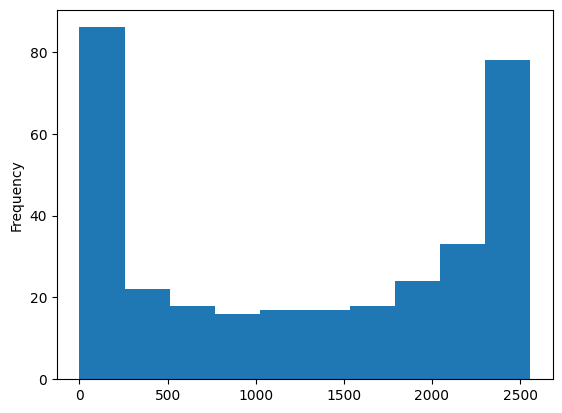

In [ ]:
df.isna().sum(axis=0).plot(kind='hist')

In [ ]:
# выбираем признаки
cols = ['ticker', 'publish_date', 'Total Revenue', 'Pretax Income', 'Net Income', 'Diluted EPS', 'Cost Of Revenue', 'Total Expenses', 'Tax Provision', 'Total Assets', 'Net Tangible Assets', 'Cash And Cash Equivalents', 'Total Debt', 'Goodwill And Other Intangible Assets', 'open', 'close']

In [ ]:
# создаем таргет
df_show = df[cols].sort_values(['ticker', 'publish_date']).drop_duplicates()
df_show['target'] =  (df_show['close'] - df_show['open']) / df_show['open']
df_show = df_show.drop(columns=['open', 'close'])

In [ ]:
# Удаляю дату публикации отчетности и таргет (относительное изменение цены между закрытием и открытием торгов)
# Для остальных признаков считаю их относительное изменение
df_show_1 = df_show.drop(columns=['publish_date', 'target']).groupby('ticker').pct_change()

# при подсчете относительного изменения могло произойти деление на ноль, поэтому меняем inf на Nan
df_show_1.replace([np.inf, -np.inf], np.nan, inplace=True)
df_show_1

Total Revenue  Pretax Income  Net Income  Diluted EPS  Cost Of Revenue  \
0               NaN            NaN         NaN          NaN              NaN   
1          0.076251       0.146096    0.118541     0.118182         0.074454   
2         -0.050297      -0.098901   -0.043478    -0.032520        -0.058542   
3         -0.022210      -0.080488   -0.142045    -0.142857         0.006345   
4         -0.026209      -0.649867   -0.632450    -0.627451         0.278689   
...             ...            ...         ...          ...              ...   
2554            NaN            NaN         NaN          NaN              NaN   
2555      -0.024366      -0.004478    0.000000     0.008929        -0.028800   
2556       0.018981      -0.112444   -0.128544    -0.123894         0.075783   
2557      -0.019608       0.177365    0.197397     0.202020        -0.099541   
2558       0.090000       0.251076    0.215580     0.218487         0.032313   

      Total Expenses  Tax Provision  Total Assets  Net Tangible Assets  \
0                NaN            NaN           NaN                  NaN   
1           0.054323       0.279412      0.003052             0.755102   
2          -0.034833      -0.333333      0.038323             0.581395   
3           0.003008       0.293103     -0.011631             0.229167   
4           0.153673      -0.720000     -0.010841             0.068794   
...              ...            ...           ...                  ...   
2554             NaN            NaN           NaN                  NaN   
2555       -0.035445      -0.014184     -0.006972             0.387234   
2556        0.055512      -0.050360      0.091487            -0.572086   
2557       -0.057778       0.106061     -0.078459             0.584229   
2558        0.058176       0.383562     -0.000364             0.490950   

      Cash And Cash Equivalents  Total Debt  \
0                           NaN         NaN   
1                     -0.016807   -0.049107   
2                      0.187085    0.072951   
3                     -0.060000   -0.080108   
4                      0.131064    0.020490   
...                         ...         ...   
2554                        NaN         NaN   
2555                  -0.054758    0.002228   
2556                   0.429085    0.198696   
2557                  -0.411518   -0.166625   
2558                  -0.185748    0.000445   

      Goodwill And Other Intangible Assets  
0                                      NaN  
1                                -0.005003  
2                                 0.004190  
3                                -0.003130  
4                                -0.061113  
...                                    ...  
2554                                   NaN  
2555                             -0.024088  
2556                              0.028671  
2557                             -0.017935  
2558                             -0.021224  

[2468 rows x 12 columns]

In [ ]:
# Добавляю таргет
df_show_2 = pd.concat([df_show_1, df_show['target']], axis=1)
df_show_2

Total Revenue  Pretax Income  Net Income  Diluted EPS  Cost Of Revenue  \
0               NaN            NaN         NaN          NaN              NaN   
1          0.076251       0.146096    0.118541     0.118182         0.074454   
2         -0.050297      -0.098901   -0.043478    -0.032520        -0.058542   
3         -0.022210      -0.080488   -0.142045    -0.142857         0.006345   
4         -0.026209      -0.649867   -0.632450    -0.627451         0.278689   
...             ...            ...         ...          ...              ...   
2554            NaN            NaN         NaN          NaN              NaN   
2555      -0.024366      -0.004478    0.000000     0.008929        -0.028800   
2556       0.018981      -0.112444   -0.128544    -0.123894         0.075783   
2557      -0.019608       0.177365    0.197397     0.202020        -0.099541   
2558       0.090000       0.251076    0.215580     0.218487         0.032313   

      Total Expenses  Tax Provision  Total Assets  Net Tangible Assets  \
0                NaN            NaN           NaN                  NaN   
1           0.054323       0.279412      0.003052             0.755102   
2          -0.034833      -0.333333      0.038323             0.581395   
3           0.003008       0.293103     -0.011631             0.229167   
4           0.153673      -0.720000     -0.010841             0.068794   
...              ...            ...           ...                  ...   
2554             NaN            NaN           NaN                  NaN   
2555       -0.035445      -0.014184     -0.006972             0.387234   
2556        0.055512      -0.050360      0.091487            -0.572086   
2557       -0.057778       0.106061     -0.078459             0.584229   
2558        0.058176       0.383562     -0.000364             0.490950   

      Cash And Cash Equivalents  Total Debt  \
0                           NaN         NaN   
1                     -0.016807   -0.049107   
2                      0.187085    0.072951   
3                     -0.060000   -0.080108   
4                      0.131064    0.020490   
...                         ...         ...   
2554                        NaN         NaN   
2555                  -0.054758    0.002228   
2556                   0.429085    0.198696   
2557                  -0.411518   -0.166625   
2558                  -0.185748    0.000445   

      Goodwill And Other Intangible Assets    target  
0                                      NaN -0.000903  
1                                -0.005003 -0.003296  
2                                 0.004190  0.001552  
3                                -0.003130 -0.003023  
4                                -0.061113 -0.005225  
...                                    ...       ...  
2554                                   NaN -0.038130  
2555                             -0.024088 -0.022438  
2556                              0.028671 -0.008879  
2557                             -0.017935  0.062321  
2558                             -0.021224  0.039253  

[2468 rows x 13 columns]

In [ ]:
# Удаляю строки с пропусками (первый квартал для каждой компании)
df_show_3 = df_show_2.dropna(thresh=2)
df_show_3

Total Revenue  Pretax Income  Net Income  Diluted EPS  Cost Of Revenue  \
1          0.076251       0.146096    0.118541     0.118182         0.074454   
2         -0.050297      -0.098901   -0.043478    -0.032520        -0.058542   
3         -0.022210      -0.080488   -0.142045    -0.142857         0.006345   
4         -0.026209      -0.649867   -0.632450    -0.627451         0.278689   
6          0.002980       0.091211    0.014706     0.014706         0.011505   
...             ...            ...         ...          ...              ...   
2553      -0.070322      -0.198582   -0.142157    -0.165414              NaN   
2555      -0.024366      -0.004478    0.000000     0.008929        -0.028800   
2556       0.018981      -0.112444   -0.128544    -0.123894         0.075783   
2557      -0.019608       0.177365    0.197397     0.202020        -0.099541   
2558       0.090000       0.251076    0.215580     0.218487         0.032313   

      Total Expenses  Tax Provision  Total Assets  Net Tangible Assets  \
1           0.054323       0.279412      0.003052             0.755102   
2          -0.034833      -0.333333      0.038323             0.581395   
3           0.003008       0.293103     -0.011631             0.229167   
4           0.153673      -0.720000     -0.010841             0.068794   
6           0.010238       0.377953     -0.019290            -0.036938   
...              ...            ...           ...                  ...   
2553             NaN      -0.346154     -0.015163             0.024266   
2555       -0.035445      -0.014184     -0.006972             0.387234   
2556        0.055512      -0.050360      0.091487            -0.572086   
2557       -0.057778       0.106061     -0.078459             0.584229   
2558        0.058176       0.383562     -0.000364             0.490950   

      Cash And Cash Equivalents  Total Debt  \
1                     -0.016807   -0.049107   
2                      0.187085    0.072951   
3                     -0.060000   -0.080108   
4                      0.131064    0.020490   
6                     -0.172070   -0.004079   
...                         ...         ...   
2553                  -0.330534   -0.188537   
2555                  -0.054758    0.002228   
2556                   0.429085    0.198696   
2557                  -0.411518   -0.166625   
2558                  -0.185748    0.000445   

      Goodwill And Other Intangible Assets    target  
1                                -0.005003 -0.003296  
2                                 0.004190  0.001552  
3                                -0.003130 -0.003023  
4                                -0.061113 -0.005225  
6                                -0.001621 -0.035125  
...                                    ...       ...  
2553                             -0.000941  0.050610  
2555                             -0.024088 -0.022438  
2556                              0.028671 -0.008879  
2557                             -0.017935  0.062321  
2558                             -0.021224  0.039253  

[1969 rows x 13 columns]

## Распределение признаков

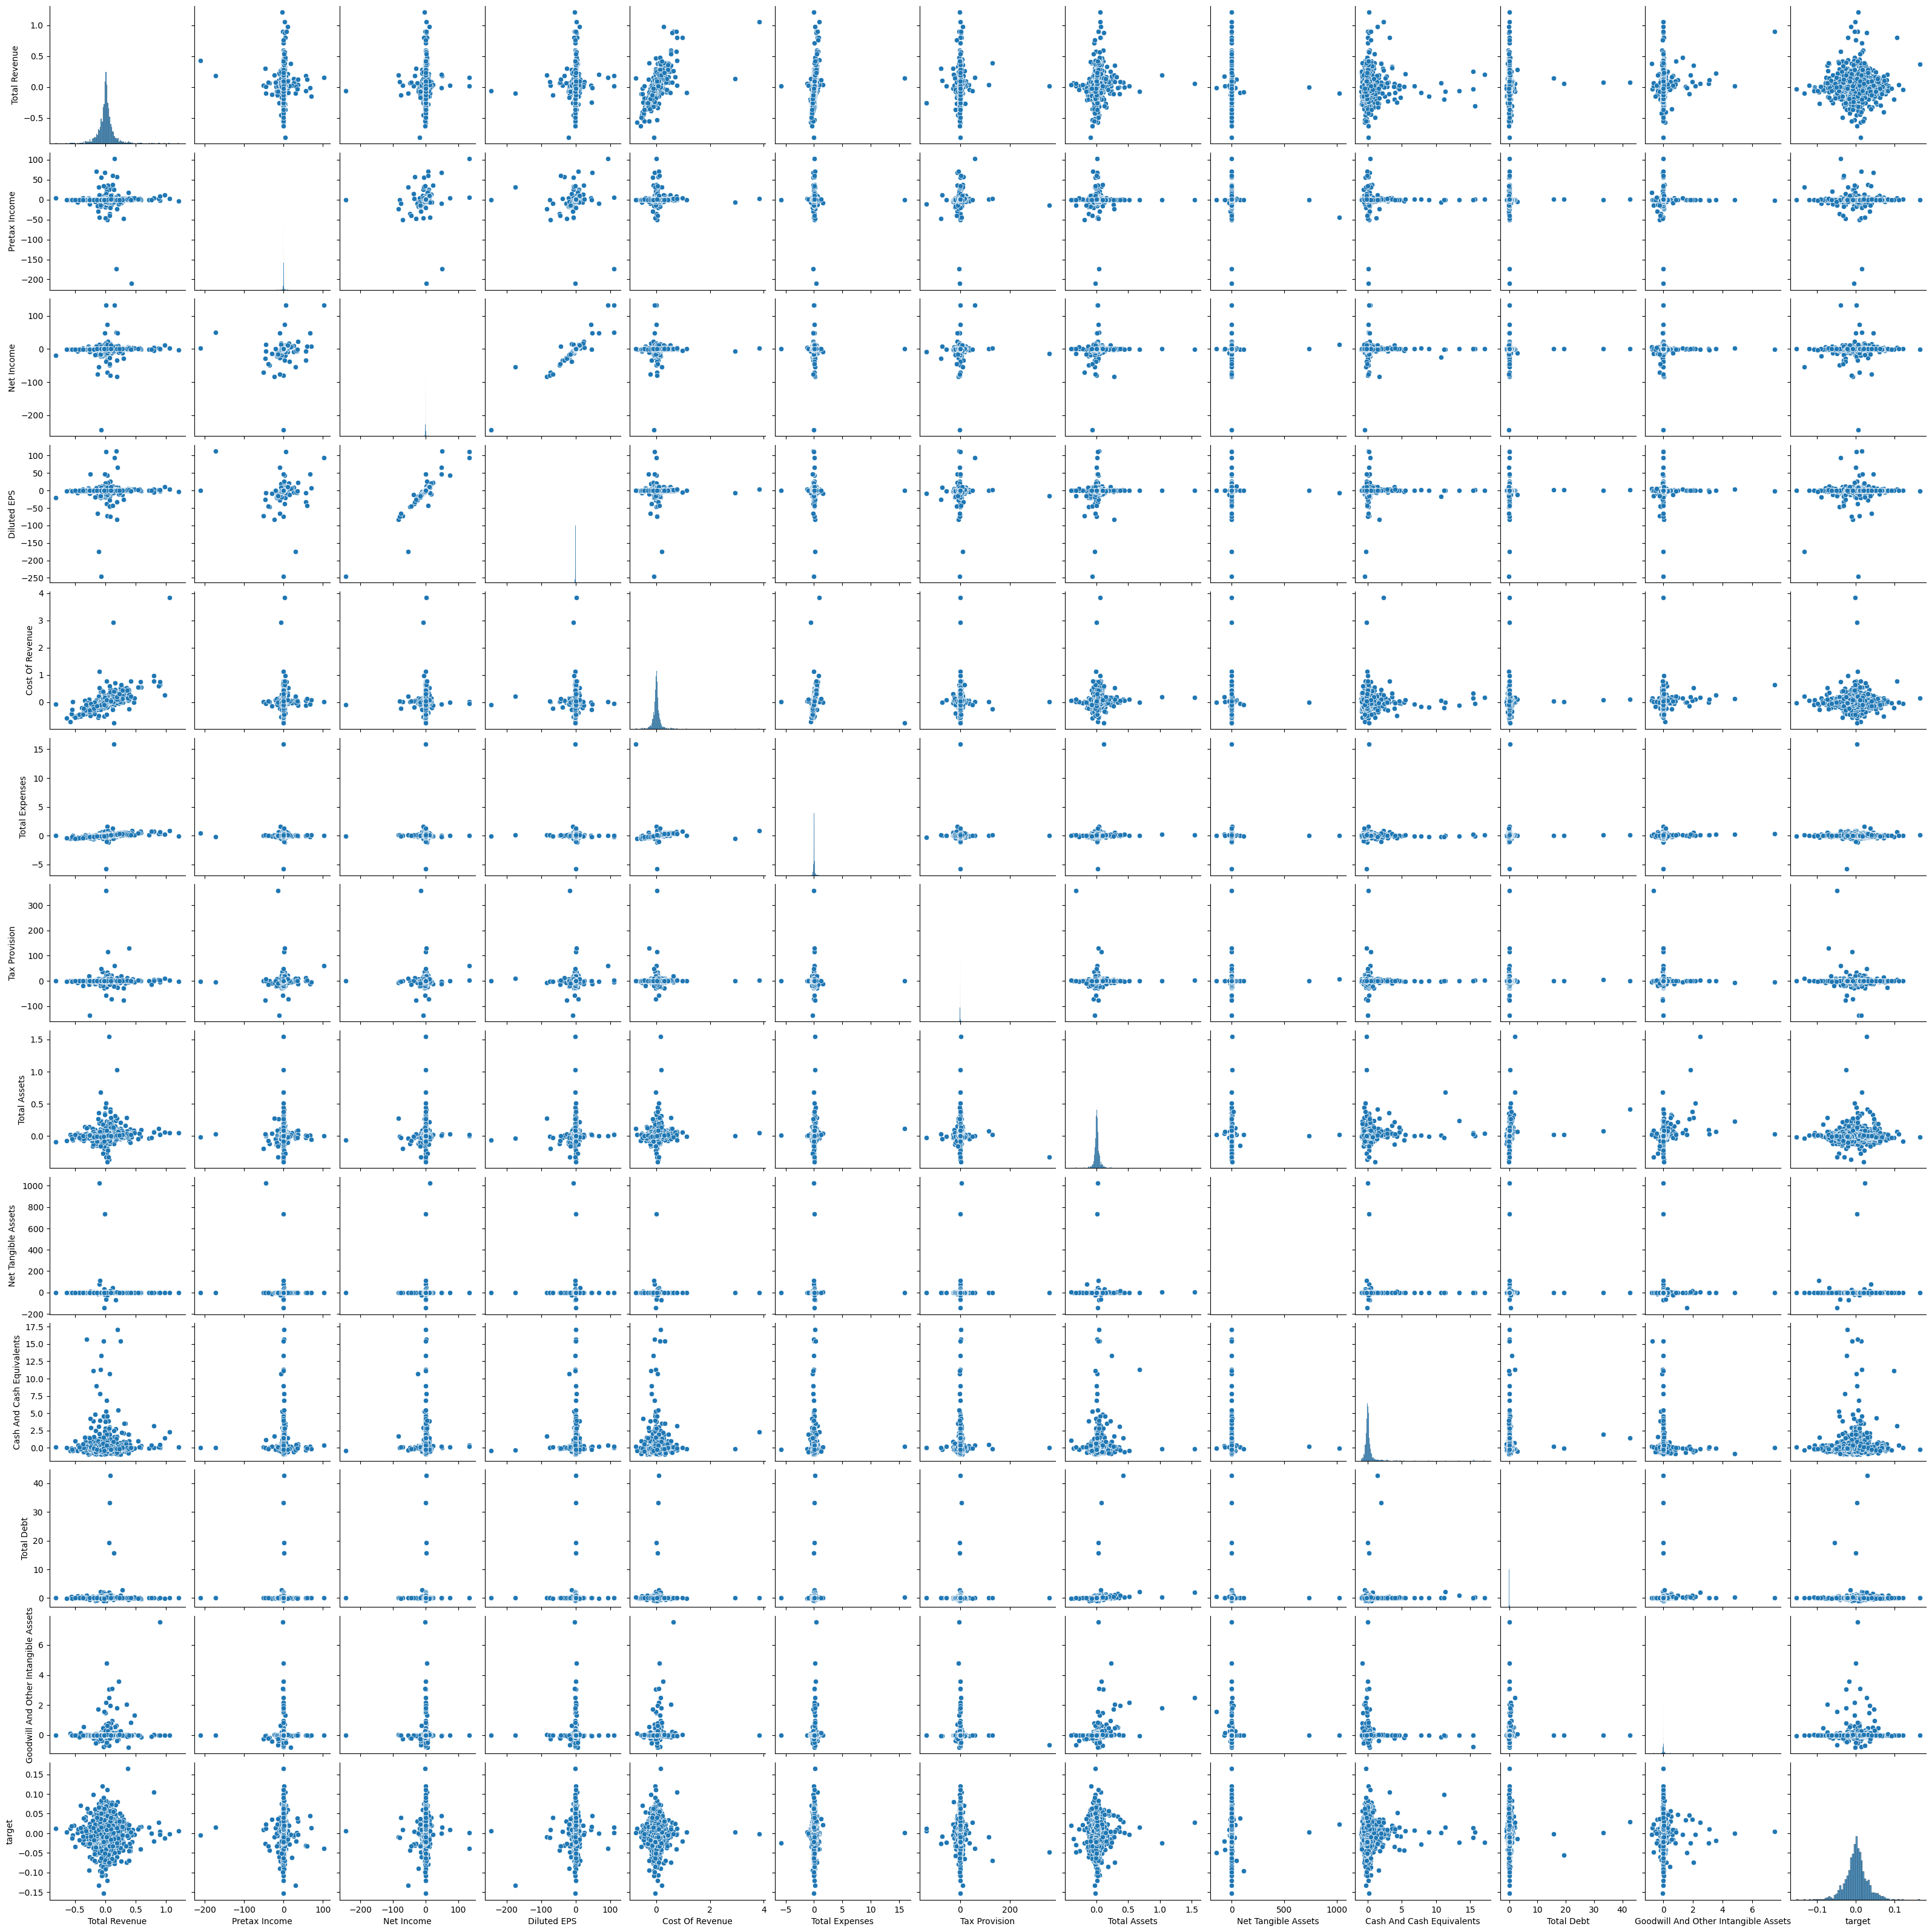

In [ ]:
sns.pairplot(df_show_3)

## Статистика по признакам

In [ ]:
# Разделим данные на признаки и таргет

X_show_3 = df_show_3.drop(columns=['target'])
y_show_3 = df_show_3['target']

In [ ]:
X_show_3.describe()

Total Revenue  Pretax Income   Net Income  Diluted EPS  \
count    1969.000000    1969.000000  1968.000000  1968.000000   
mean        0.011875      -0.151579    -0.303511    -0.342335   
std         0.137857       8.275412     8.906050     9.546754   
min        -0.815252    -210.500000  -244.500000  -245.510978   
25%        -0.039959      -0.326136    -0.351228    -0.354786   
50%         0.010598      -0.032419    -0.041763    -0.039192   
75%         0.057126       0.196721     0.214201     0.215792   
max         1.211648     102.705882   133.000000   112.000000   

       Cost Of Revenue  Total Expenses  Tax Provision  Total Assets  \
count      1757.000000     1865.000000    1940.000000   1969.000000   
mean          0.013859        0.016792      -0.044145      0.012437   
std           0.181147        0.417435      11.086510      0.069013   
min          -0.752927       -5.815574    -137.000000     -0.398084   
25%          -0.041528       -0.036478      -0.473610     -0.008184   
50%           0.008057        0.010428      -0.074560      0.007315   
75%           0.057403        0.052565       0.243450      0.025151   
max           3.834962       15.908756     359.282051      1.542340   

       Net Tangible Assets  Cash And Cash Equivalents   Total Debt  \
count          1969.000000                1969.000000  1957.000000   
mean              0.907643                   0.159617     0.076478   
std              28.929127                   1.089224     1.352544   
min            -146.260870                  -0.941860    -0.966623   
25%              -0.045972                  -0.142815    -0.019596   
50%               0.004373                   0.013283     0.000161   
75%               0.060835                   0.186646     0.024268   
max            1024.905596                  17.105263    42.596959   

       Goodwill And Other Intangible Assets  
count                           1784.000000  
mean                               0.023182  
std                                0.295320  
min                               -0.797101  
25%                               -0.010428  
50%                               -0.001612  
75%                                0.003628  
max                                7.515625

In [ ]:
y_show_3.describe()

count    1969.000000
mean        0.000964
std         0.028224
min        -0.153265
25%        -0.013699
50%         0.001063
75%         0.015512
max         0.164861
Name: target, dtype: float64

В среднем по всем акциям цена не сильно меняются в день отчета, но существуют бумаги, которые падают или растут влоть до 16%.

## Задача регрессии

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Разобьем данные на обучение и тест при помощи функции train_test_split
X_train_show_3, X_test_show_3, y_train_show_3, y_test_show_3 = train_test_split(X_show_3, y_show_3, test_size=0.2, random_state=14)

In [ ]:
# Импортируем LightGBM и построим baseline
import lightgbm as lgb
LGB_model_show_3 = lgb.LGBMRegressor(verbose=0)
LGB_model_show_3.fit(X_train_show_3, y_train_show_3)
y_test_show_3_pred = LGB_model_show_3.predict(X_test_show_3)
y_train_show_3_pred = LGB_model_show_3.predict(X_train_show_3)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [ ]:
print(f'MAE test: {mean_absolute_error(y_test_show_3, y_test_show_3_pred)}')
print(f'MAE train: {mean_absolute_error(y_train_show_3, y_train_show_3_pred)}')
print(f'R2 test: {r2_score(y_test_show_3, y_test_show_3_pred)}')
print(f'R2 train: {r2_score(y_train_show_3, y_train_show_3_pred)}')
print(f'MAPE test: {mean_absolute_percentage_error(y_test_show_3, y_test_show_3_pred)}')
print(f'MAPE train: {mean_absolute_percentage_error(y_train_show_3, y_train_show_3_pred)}')

MAE test: 0.022184373296417696
MAE train: 0.009130411778918263
R2 test: -0.07266563452772234
R2 train: 0.8001596823748204
MAPE test: 2.157296416683775
MAPE train: 19442184219.188446


Модель переобученна и плохо предсказывает, MAE на уровне среднего значения таргета

### Стандартизируем признаки и подберем параметры с помощью RandomizedSearchCV

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_show_3)

StandardScaler()

In [ ]:
X_train_norm_show_3 = scaler.transform(X_train_show_3)
X_test_norm_show_3 = scaler.transform(X_test_show_3)

### Обучение

In [ ]:
# Воспользуем функцией RandomizedSearchCV
# В качестве определения "лучшей" модели выберем f1_score

from sklearn.model_selection import RandomizedSearchCV
grid_LGBM_show_3 = RandomizedSearchCV(
            lgb.LGBMRegressor(verbose=0),          # Алгоритм, в котором будем подбирать параметры
            param_distributions = {                 # Сетка параметров в виде словаря
                'max_depth': range(2, 7),
                'learning_rate': np.linspace(0.001, 0.3, 100),
            },
            scoring = 'neg_mean_absolute_error',
            cv = 3,                                 # CV для кросс-валидации (число или индексы)
            n_jobs = -1,                            # Число используемых ядер для работы
            return_train_score = True,              # Считать ли метрики на обучающей части
            n_iter=10,                              # Число итераций (сколько будем брать случайных наборов)
            verbose = 5,                            # Чем больше, тем алгоритм разговорчивее
        )

# Обучим сетку на обучающем датасете при помощи метода fit
grid_LGBM_show_3.fit(X_train_norm_show_3, y_train_show_3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.


RandomizedSearchCV(cv=3, estimator=LGBMRegressor(verbose=0), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.001     , 0.0040202 , 0.0070404 , 0.01006061, 0.01308081,
       0.01610101, 0.01912121, 0.02214141, 0.02516162, 0.02818182,
       0.03120202, 0.03422222, 0.03724242, 0.04026263, 0.04328283,
       0.04630303, 0.04932323, 0.05234343, 0.05536364, 0.05838384,
       0.06140404, 0.06442424, 0....
       0.22751515, 0.23053535, 0.23355556, 0.23657576, 0.23959596,
       0.24261616, 0.24563636, 0.24865657, 0.25167677, 0.25469697,
       0.25771717, 0.26073737, 0.26375758, 0.26677778, 0.26979798,
       0.27281818, 0.27583838, 0.27885859, 0.28187879, 0.28489899,
       0.28791919, 0.29093939, 0.2939596 , 0.2969798 , 0.3       ]),
                                        'max_depth': range(2, 7)},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=5)

In [ ]:
# Выведем набор лучших параметров и лучшую метрику

print(f"Лучшая метрика:   {grid_LGBM_show_3.best_score_}")
print(f"Лучшие параметры: {grid_LGBM_show_3.best_params_}")

Лучшая метрика:   -0.020738674446765235
Лучшие параметры: {'max_depth': 2, 'learning_rate': 0.03422222222222222}


In [ ]:
y_test_show_3_pred=grid_LGBM_show_3.best_estimator_.predict(X_test_norm_show_3)
y_train_show_3_pred=grid_LGBM_show_3.best_estimator_.predict(X_train_norm_show_3)

In [ ]:
print(f'MAE test: {mean_absolute_error(y_test_show_3, y_test_show_3_pred)}')
print(f'MAE train: {mean_absolute_error(y_train_show_3, y_train_show_3_pred)}')
print(f'R2 test: {r2_score(y_test_show_3, y_test_show_3_pred)}')
print(f'R2 train: {r2_score(y_train_show_3, y_train_show_3_pred)}')
print(f'MAPE test: {mean_absolute_percentage_error(y_test_show_3, y_test_show_3_pred)}')
print(f'MAPE train: {mean_absolute_percentage_error(y_train_show_3, y_train_show_3_pred)}')

MAE test: 0.020563476879290454
MAE train: 0.019936856767113553
R2 test: -0.006912750601739237
R2 train: 0.062251530087853224
MAPE test: 1.2650917304801041
MAPE train: 27740260810.24645


Ошибки регрессии имеет достаточное высокое значение

## Задача классификации
Упростим задачу предсказания изменения цены и решим задачу классификации: как поведет себя цена после публикации отчетности - вырастит (класс 1) или упадет (класс 0)

In [ ]:
df_show_3_class=df_show_3.copy()
df_show_3_class['target'] = 1*(df_show_3['target']>0)

### Распределение признаков с учетом класса

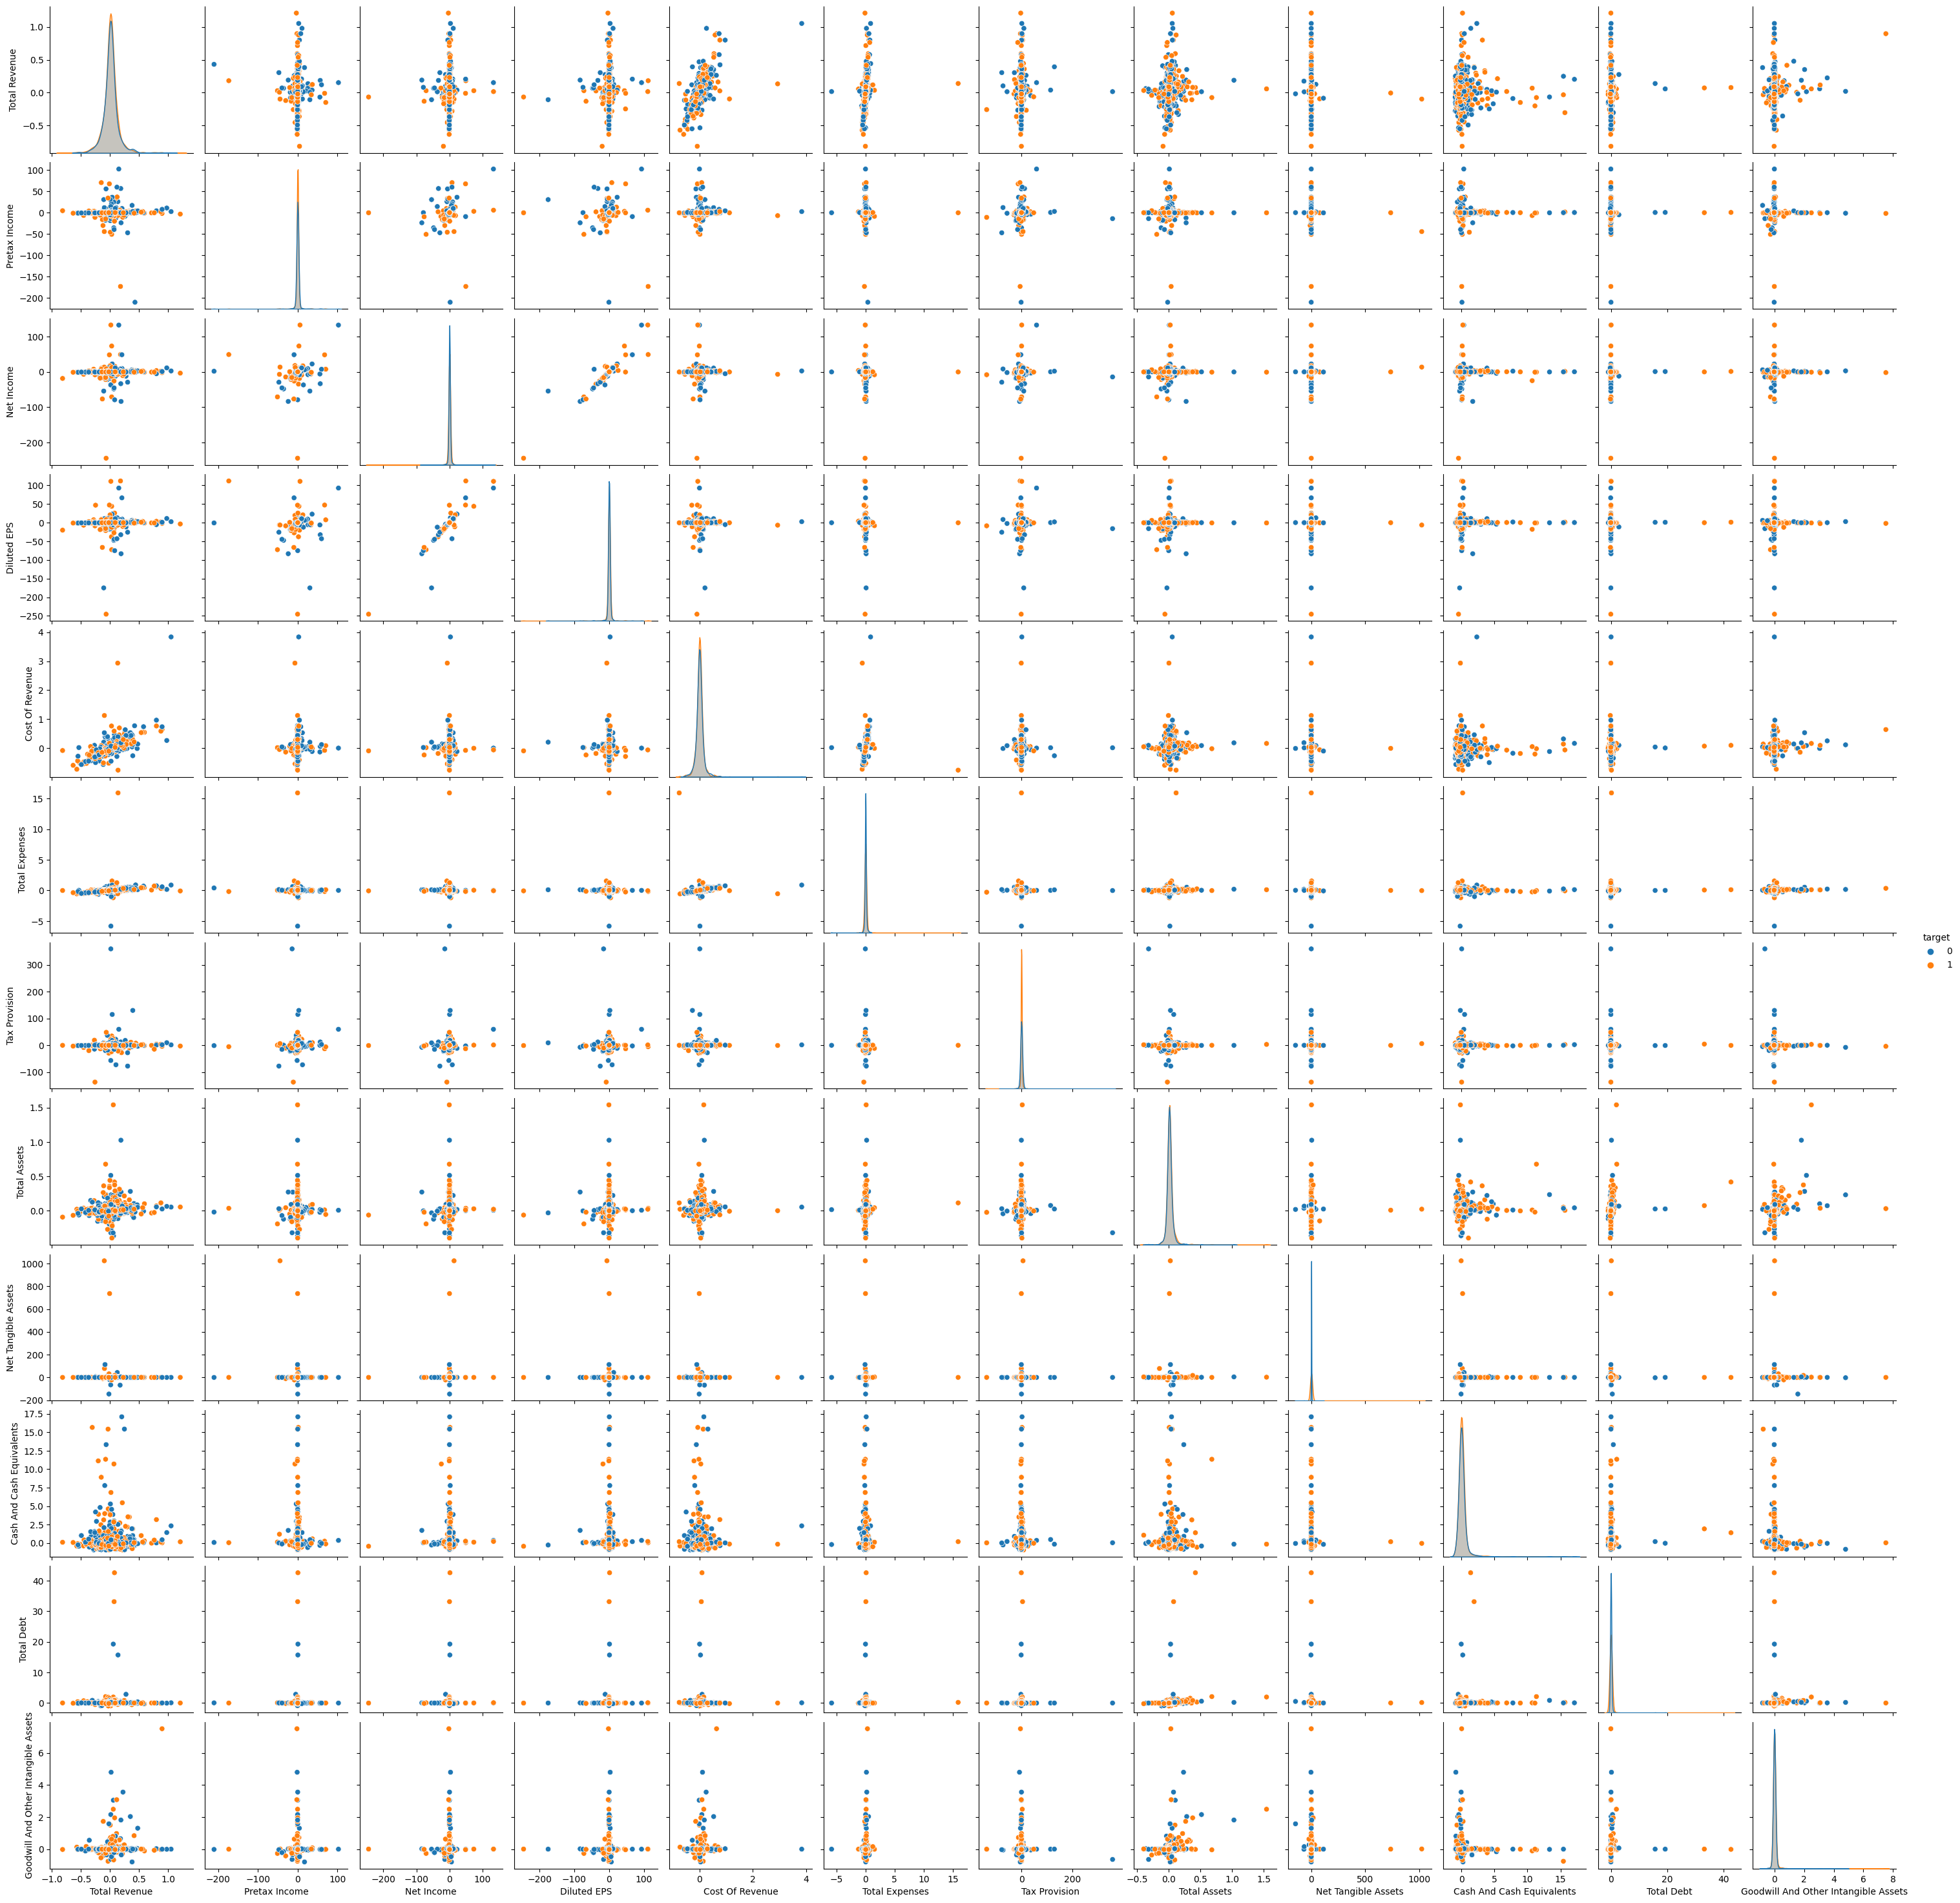

In [ ]:
sns.pairplot(df_show_3_class, hue='target')

### Подготовка и обучение

In [ ]:
# Разделим данные на признаки и таргет

X_show_2 = df_show_3_class.drop(columns=['target'])
y_show_2 = df_show_3_class['target']

In [ ]:
# Разобьем данные на обучение и тест при помощи функции train_test_split

X_train_show_2, X_test_show_2, y_train_show_2, y_test_show_2 = train_test_split(X_show_2, y_show_2, test_size=0.2, stratify=y_show_2, random_state=14)

In [ ]:
# Воспользуем функцией RandomizedSearchCV
# В качестве определения "лучшей" модели выберем f1_score

from sklearn.model_selection import RandomizedSearchCV
grid_LGBM_class_show_2 = RandomizedSearchCV(
            lgb.LGBMClassifier(verbose=0),          # Алгоритм, в котором будем подбирать параметры
            param_distributions = {                 # Сетка параметров в виде словаря
                'max_depth': range(2, 7),
                'learning_rate': np.linspace(0.001, 0.3, 100),
            },
            scoring = 'f1',
            cv = 3,                                 # CV для кросс-валидации (число или индексы)
            n_jobs = -1,                            # Число используемых ядер для работы
            return_train_score = True,              # Считать ли метрики на обучающей части
            n_iter=10,                              # Число итераций (сколько будем брать случайных наборов)
            verbose = 0,                            # Чем больше, тем алгоритм разговорчивее
        )

# Обучим сетку на обучающем датасете при помощи метода fit
grid_LGBM_class_show_2.fit(X_train_show_2, y_train_show_2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(verbose=0), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.001     , 0.0040202 , 0.0070404 , 0.01006061, 0.01308081,
       0.01610101, 0.01912121, 0.02214141, 0.02516162, 0.02818182,
       0.03120202, 0.03422222, 0.03724242, 0.04026263, 0.04328283,
       0.04630303, 0.04932323, 0.05234343, 0.05536364, 0.05838384,
       0.06140404, 0.06442424, 0...
       0.21241414, 0.21543434, 0.21845455, 0.22147475, 0.22449495,
       0.22751515, 0.23053535, 0.23355556, 0.23657576, 0.23959596,
       0.24261616, 0.24563636, 0.24865657, 0.25167677, 0.25469697,
       0.25771717, 0.26073737, 0.26375758, 0.26677778, 0.26979798,
       0.27281818, 0.27583838, 0.27885859, 0.28187879, 0.28489899,
       0.28791919, 0.29093939, 0.2939596 , 0.2969798 , 0.3       ]),
                                        'max_depth': range(2, 7)},
                   return_train_score=True, scoring='f1')

In [ ]:
# Выведем набор лучших параметров и лучшую метрику

print(f"Лучшая метрика:   {grid_LGBM_class_show_2.best_score_}")
print(f"Лучшие параметры: {grid_LGBM_class_show_2.best_params_}")

Лучшая метрика:   0.563661215552112
Лучшие параметры: {'max_depth': 4, 'learning_rate': 0.08254545454545455}


In [ ]:
y_test_show_2_pred=grid_LGBM_class_show_2.best_estimator_.predict(X_test_show_2)
y_train_show_2_pred=grid_LGBM_class_show_2.best_estimator_.predict(X_train_show_2)

### Результаты

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

TEST
              precision    recall  f1-score   support

           0       0.51      0.44      0.47       189
           1       0.54      0.60      0.57       205

    accuracy                           0.53       394
   macro avg       0.52      0.52      0.52       394
weighted avg       0.52      0.53      0.52       394

TRAIN
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       754
           1       0.81      0.88      0.84       821

    accuracy                           0.83      1575
   macro avg       0.83      0.83      0.83      1575
weighted avg       0.83      0.83      0.83      1575



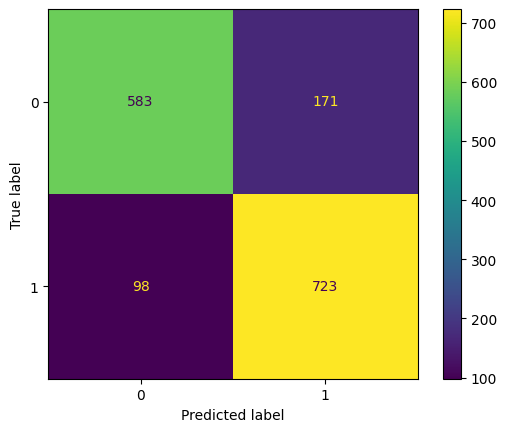

In [ ]:
# Получить отчет классификации передав в classification_report реальные метки и предсказанные
print("TEST")
print(classification_report(y_test_show_2, y_test_show_2_pred))
print("TRAIN")
print(classification_report(y_train_show_2, y_train_show_2_pred))

# Посмотреть на матрицу ошибок, передав в plot_confusion_matrix модель, тестовые данные и тестовые метки
confusion_matrix_LGBM_show_2 = confusion_matrix(y_train_show_2, y_train_show_2_pred)
ConfusionMatrixDisplay(confusion_matrix_LGBM_show_2, display_labels=[0, 1]).plot()

plt.show()

### Важность признаков

Важность перемешиванием

In [ ]:
from sklearn.inspection import permutation_importance
# Воспользуемся поиском важности перемешиванием, для лучшей модели CatBoost

result_LGBM = permutation_importance(grid_LGBM_class_show_2.best_estimator_, X_test_show_2, y_test_show_2,
                                     n_repeats=30,
                                     random_state=0)
X_test_show_2.columns[(result_LGBM['importances_mean'] > 0)]

Index(['Total Revenue', 'Net Income', 'Diluted EPS', 'Cost Of Revenue',
       'Total Expenses', 'Total Assets', 'Net Tangible Assets',
       'Cash And Cash Equivalents', 'Total Debt',
       'Goodwill And Other Intangible Assets'],
      dtype='object')

SHAP

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


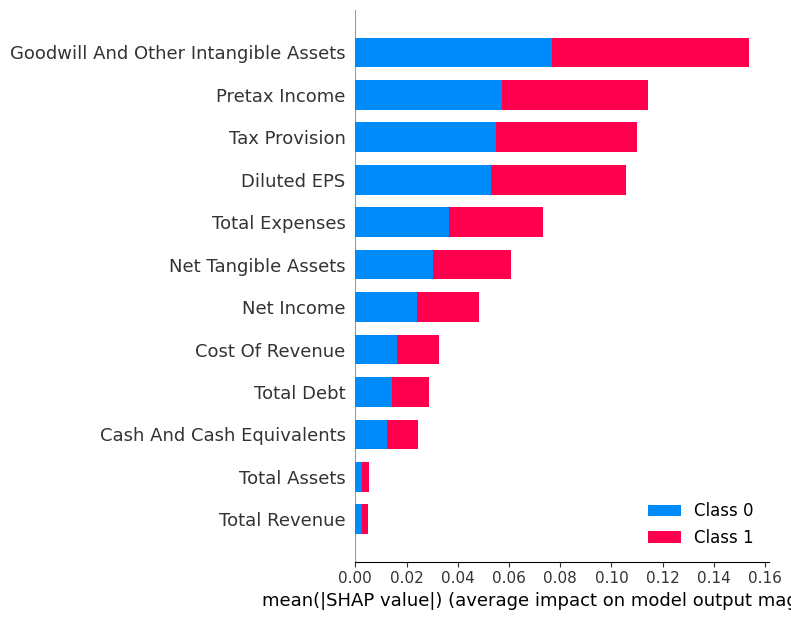

In [ ]:
explainer = shap.TreeExplainer(grid_LGBM_class_show_2.best_estimator_)
shap_values = explainer.shap_values(X_test_show_2)
shap.summary_plot(shap_values, X_test_show_2, max_display=25)

## Попробуем нормализовать данные

In [ ]:
scaler_class = StandardScaler()
scaler_class.fit(X_train_show_2)

StandardScaler()

In [ ]:
X_train_norm_show_2 = scaler_class.transform(X_train_show_2)
X_test_norm_show_2 = scaler_class.transform(X_test_show_2)

In [ ]:
# Воспользуем функцией RandomizedSearchCV
# В качестве определения "лучшей" модели выберем f1_score

from sklearn.model_selection import RandomizedSearchCV
grid_LGBM_class_show_2 = RandomizedSearchCV(
            lgb.LGBMClassifier(verbose=0),          # Алгоритм, в котором будем подбирать параметры
            param_distributions = {                 # Сетка параметров в виде словаря
                'max_depth': range(2, 7),
                'learning_rate': np.linspace(0.001, 0.3, 100),
            },
            scoring = 'f1',
            cv = 3,                                 # CV для кросс-валидации (число или индексы)
            n_jobs = -1,                            # Число используемых ядер для работы
            return_train_score = True,              # Считать ли метрики на обучающей части
            n_iter=10,                              # Число итераций (сколько будем брать случайных наборов)
            verbose = 5,                            # Чем больше, тем алгоритм разговорчивее
        )

# Обучим сетку на обучающем датасете при помощи метода fit
grid_LGBM_class_show_2.fit(X_train_norm_show_2, y_train_show_2)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(verbose=0), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.001     , 0.0040202 , 0.0070404 , 0.01006061, 0.01308081,
       0.01610101, 0.01912121, 0.02214141, 0.02516162, 0.02818182,
       0.03120202, 0.03422222, 0.03724242, 0.04026263, 0.04328283,
       0.04630303, 0.04932323, 0.05234343, 0.05536364, 0.05838384,
       0.06140404, 0.06442424, 0...
       0.21241414, 0.21543434, 0.21845455, 0.22147475, 0.22449495,
       0.22751515, 0.23053535, 0.23355556, 0.23657576, 0.23959596,
       0.24261616, 0.24563636, 0.24865657, 0.25167677, 0.25469697,
       0.25771717, 0.26073737, 0.26375758, 0.26677778, 0.26979798,
       0.27281818, 0.27583838, 0.27885859, 0.28187879, 0.28489899,
       0.28791919, 0.29093939, 0.2939596 , 0.2969798 , 0.3       ]),
                                        'max_depth': range(2, 7)},
                   return_train_score=True, scoring='f1', verbose=5)

In [ ]:
# Выведем набор лучших параметров и лучшую метрику

print(f"Лучшая метрика:   {grid_LGBM_class_show_2.best_score_}")
print(f"Лучшие параметры: {grid_LGBM_class_show_2.best_params_}")

Лучшая метрика:   0.596119083654654
Лучшие параметры: {'max_depth': 4, 'learning_rate': 0.0070404040404040405}


In [ ]:
y_test_show_2_pred=grid_LGBM_class_show_2.best_estimator_.predict(X_test_norm_show_2)
y_train_show_2_pred=grid_LGBM_class_show_2.best_estimator_.predict(X_train_norm_show_2)

TEST
              precision    recall  f1-score   support

           0       0.47      0.28      0.35       189
           1       0.52      0.71      0.60       205

    accuracy                           0.50       394
   macro avg       0.49      0.49      0.47       394
weighted avg       0.49      0.50      0.48       394

TRAIN
              precision    recall  f1-score   support

           0       0.72      0.45      0.55       754
           1       0.62      0.84      0.71       821

    accuracy                           0.65      1575
   macro avg       0.67      0.64      0.63      1575
weighted avg       0.67      0.65      0.64      1575



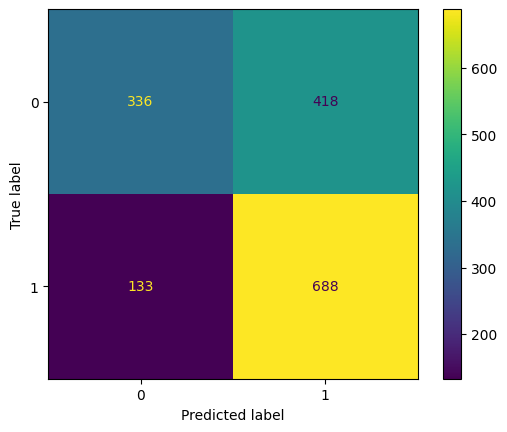

In [ ]:
# Получить отчет классификации передав в classification_report реальные метки и предсказанные
print("TEST")
print(classification_report(y_test_show_2, y_test_show_2_pred))
print("TRAIN")
print(classification_report(y_train_show_2, y_train_show_2_pred))

# Посмотреть на матрицу ошибок, передав в plot_confusion_matrix модель, тестовые данные и тестовые метки
confusion_matrix_LGBM_show_2 = confusion_matrix(y_train_show_2, y_train_show_2_pred)
ConfusionMatrixDisplay(confusion_matrix_LGBM_show_2, display_labels=[0, 1]).plot()

plt.show()

Стандартизация признаков приводит к ухудшению результата

## Пробуем решить случайным лесом

In [ ]:
# Удаляю строки с пропусками
df_show_forest = df_show_2.dropna(thresh=13)
df_show_forest

Total Revenue  Pretax Income  Net Income  Diluted EPS  Cost Of Revenue  \
1          0.076251       0.146096    0.118541     0.118182         0.074454   
2         -0.050297      -0.098901   -0.043478    -0.032520        -0.058542   
3         -0.022210      -0.080488   -0.142045    -0.142857         0.006345   
4         -0.026209      -0.649867   -0.632450    -0.627451         0.278689   
6          0.002980       0.091211    0.014706     0.014706         0.011505   
...             ...            ...         ...          ...              ...   
2548      -0.135943      -0.075676   -0.040000    -0.041379        -0.142276   
2555      -0.024366      -0.004478    0.000000     0.008929        -0.028800   
2556       0.018981      -0.112444   -0.128544    -0.123894         0.075783   
2557      -0.019608       0.177365    0.197397     0.202020        -0.099541   
2558       0.090000       0.251076    0.215580     0.218487         0.032313   

      Total Expenses  Tax Provision  Total Assets  Net Tangible Assets  \
1           0.054323       0.279412      0.003052             0.755102   
2          -0.034833      -0.333333      0.038323             0.581395   
3           0.003008       0.293103     -0.011631             0.229167   
4           0.153673      -0.720000     -0.010841             0.068794   
6           0.010238       0.377953     -0.019290            -0.036938   
...              ...            ...           ...                  ...   
2548       -0.141880      -0.228571     -0.002408            -0.078980   
2555       -0.035445      -0.014184     -0.006972             0.387234   
2556        0.055512      -0.050360      0.091487            -0.572086   
2557       -0.057778       0.106061     -0.078459             0.584229   
2558        0.058176       0.383562     -0.000364             0.490950   

      Cash And Cash Equivalents  Total Debt  \
1                     -0.016807   -0.049107   
2                      0.187085    0.072951   
3                     -0.060000   -0.080108   
4                      0.131064    0.020490   
6                     -0.172070   -0.004079   
...                         ...         ...   
2548                  -0.200000    0.050178   
2555                  -0.054758    0.002228   
2556                   0.429085    0.198696   
2557                  -0.411518   -0.166625   
2558                  -0.185748    0.000445   

      Goodwill And Other Intangible Assets    target  
1                                -0.005003 -0.003296  
2                                 0.004190  0.001552  
3                                -0.003130 -0.003023  
4                                -0.061113 -0.005225  
6                                -0.001621 -0.035125  
...                                    ...       ...  
2548                             -0.005779  0.039793  
2555                             -0.024088 -0.022438  
2556                              0.028671 -0.008879  
2557                             -0.017935  0.062321  
2558                             -0.021224  0.039253  

[1564 rows x 13 columns]

In [ ]:
# Разделим данные на признаки и таргет

X_forest = df_show_forest.drop(columns=['target'])
y_forest = 1*(df_show_forest['target']>0)

In [ ]:
# Разобьем данные на обучение и тест при помощи функции train_test_split

X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X_forest, y_forest, test_size=0.2, stratify=y_forest, random_state=14)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
grid_forest = RandomizedSearchCV(
            RandomForestClassifier(),                # Алгоритм, в котором будем подбирать параметры
            param_distributions = {                 # Сетка параметров в виде словаря
                'max_depth': range(6, 20),
                'min_samples_split': range(2, 9),
                'max_features': range(2, 11)
            },
            scoring = 'f1',
            cv = 3,                                 # CV для кросс-валидации (число или индексы)
            n_jobs = -1,                            # Число используемых ядер для работы
            return_train_score = True,              # Считать ли метрики на обучающей части
            n_iter=16,                              # Число итераций (сколько будем брать случайных наборов)
            verbose = 5,                            # Чем больше, тем алгоритм разговорчивее
        )

# Обучим сетку на обучающем датасете при помощи метода fit
grid_forest.fit(X_train_forest, y_train_forest)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=16,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(6, 20),
                                        'max_features': range(2, 11),
                                        'min_samples_split': range(2, 9)},
                   return_train_score=True, scoring='f1', verbose=5)

In [ ]:
# Выведем набор лучших параметров (они хранятся в best_params_) и лучшую метрику

print(f"Лучшая метрика:   {grid_forest.best_score_}")
print(f"Лучшие параметры: {grid_forest.best_params_}")

Лучшая метрика:   0.5441860452574971
Лучшие параметры: {'min_samples_split': 5, 'max_features': 3, 'max_depth': 13}


In [ ]:
y_test_forest_pred=grid_forest.best_estimator_.predict(X_test_forest)
y_train_forest_pred=grid_forest.best_estimator_.predict(X_train_forest)

TEST
              precision    recall  f1-score   support

           0       0.47      0.35      0.40       152
           1       0.51      0.63      0.56       161

    accuracy                           0.49       313
   macro avg       0.49      0.49      0.48       313
weighted avg       0.49      0.49      0.48       313

TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       608
           1       1.00      1.00      1.00       643

    accuracy                           1.00      1251
   macro avg       1.00      1.00      1.00      1251
weighted avg       1.00      1.00      1.00      1251



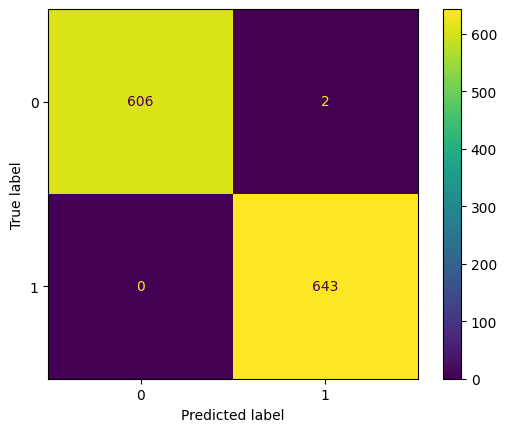

In [ ]:
# Получить отчет классификации передав в classification_report реальные метки и предсказанные
print("TEST")
print(classification_report(y_test_forest, y_test_forest_pred))
print("TRAIN")
print(classification_report(y_train_forest, y_train_forest_pred))

# Посмотреть на матрицу ошибок, передав в plot_confusion_matrix модель, тестовые данные и тестовые метки
confusion_matrix_forest = confusion_matrix(y_train_forest, y_train_forest_pred)
ConfusionMatrixDisplay(confusion_matrix_forest, display_labels=[0, 1]).plot()

plt.show()

Случайный лес сильно переобучился

# Признаки без большой корреляции

## Регрессия на основе признаков без большой корреляции

In [ ]:
# удаляю признаки 'eps', 'period', 'period until', 'forecast_eps', 'income', 'forecast_income', 'N'
df_preparation = df.sort_values(['ticker', 'publish_date'])
df_preparation['target'] =  (df_preparation['close'].round(4) - df_preparation['open'].round(4)) / df_preparation['open'].round(4)
df_preparation = df_preparation.drop(columns=['open', 'close', 'eps', 'period', 'period until', 'forecast_eps', 'income', 'forecast_income', 'N']).drop_duplicates()

In [ ]:
df_preparation

ticker publish_date  Tax Effect Of Unusual Items  Tax Rate For Calcs  \
0         A   2022-08-16                 0.000000e+00            0.137600   
1         A   2022-11-21                 0.000000e+00            0.141200   
2         A   2023-02-28                 0.000000e+00            0.137500   
3         A   2023-05-23                 0.000000e+00            0.137500   
4         A   2023-08-15                 0.000000e+00            0.137500   
...     ...          ...                          ...                 ...   
2554    ZTS   2022-08-04                -2.104478e+05            0.210448   
2555    ZTS   2022-11-03                -3.744000e+06            0.208000   
2556    ZTS   2023-02-14                -4.459459e+05            0.222973   
2557    ZTS   2023-05-04                -4.398852e+06            0.209469   
2558    ZTS   2023-08-08                -1.853211e+06            0.231651   

      Normalized EBITDA  Total Unusual Items  \
0           496000000.0                  NaN   
1           551000000.0                  NaN   
2           502000000.0                  NaN   
3           472000000.0                  NaN   
4           227000000.0                  NaN   
...                 ...                  ...   
2554        761000000.0           -1000000.0   
2555        853000000.0          -18000000.0   
2556        691000000.0           -2000000.0   
2557        818000000.0          -21000000.0   
2558        975000000.0           -8000000.0   

      Total Unusual Items Excluding Goodwill  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
...                                      ...   
2554                              -1000000.0   
2555                             -18000000.0   
2556                              -2000000.0   
2557                             -21000000.0   
2558                              -8000000.0   

      Net Income From Continuing Operation Net Minority Interest  \
0                                             329000000            
1                                             368000000            
2                                             352000000            
3                                             302000000            
4                                             111000000            
...                                                 ...            
2554                                          529000000            
2555                                          529000000            
2556                                          461000000            
2557                                          552000000            
2558                                          671000000            

      Reconciled Depreciation  Reconciled Cost Of Revenue  ...  \
0                  80000000.0                7.790000e+08  ...   
1                  73000000.0                8.370000e+08  ...   
2                  67000000.0                7.880000e+08  ...   
3                  71000000.0                7.930000e+08  ...   
4                  71000000.0                1.014000e+09  ...   
...                       ...                         ...  ...   
2554               37000000.0                6.250000e+08  ...   
2555              115000000.0                5.290000e+08  ...   
2556               35000000.0                6.530000e+08  ...   
2557               37000000.0                5.880000e+08  ...   
2558               37000000.0                6.070000e+08  ...   

      Net Income Extraordinary  EBITDA  Net Income From Tax Loss Carryforward  \
0                          NaN     NaN                                    NaN   
1                          NaN     NaN                                    NaN   
2                          NaN     NaN                                   

In [ ]:
# Убираем признаки с большим количеством пропусков
cols_nona=list(df_preparation.isna().sum()[(df_preparation.isna().sum()<100)].reset_index()['index'])
cols_nona

['ticker',
 'publish_date',
 'Tax Effect Of Unusual Items',
 'Tax Rate For Calcs',
 'Net Income From Continuing Operation Net Minority Interest',
 'Reconciled Depreciation',
 'Net Interest Income',
 'Normalized Income',
 'Net Income From Continuing And Discontinued Operation',
 'Diluted Average Shares',
 'Basic Average Shares',
 'Diluted EPS',
 'Basic EPS',
 'Diluted NI Availto Com Stockholders',
 'Net Income Common Stockholders',
 'Net Income',
 'Net Income Including Noncontrolling Interests',
 'Net Income Continuous Operations',
 'Tax Provision',
 'Pretax Income',
 'Total Revenue',
 'Operating Revenue',
 'Ordinary Shares Number',
 'Share Issued',
 'Total Debt',
 'Tangible Book Value',
 'Invested Capital',
 'Net Tangible Assets',
 'Common Stock Equity',
 'Total Capitalization',
 'Total Equity Gross Minority Interest',
 'Stockholders Equity',
 'Gains Losses Not Affecting Retained Earnings',
 'Retained Earnings',
 'Capital Stock',
 'Common Stock',
 'Total Liabilities Net Minority Intere

In [ ]:
df_preparation2 = df_preparation[cols_nona]

In [ ]:
# считаем корреляцию
R = df_preparation2.corr()
R

<ipython-input-147-18695bb131b6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  R = df_preparation2.corr()


Tax Effect Of Unusual Items  \
Tax Effect Of Unusual Items                                            1.000000   
Tax Rate For Calcs                                                    -0.107771   
Net Income From Continuing Operation Net Minori...                     0.180651   
Reconciled Depreciation                                               -0.087659   
Net Interest Income                                                    0.020361   
Normalized Income                                                      0.036365   
Net Income From Continuing And Discontinued Ope...                     0.180019   
Diluted Average Shares                                                -0.069688   
Basic Average Shares                                                  -0.069885   
Diluted EPS                                                            0.158652   
Basic EPS                                                              0.151658   
Diluted NI Availto Com Stockholders                                    0.180541   
Net Income Common Stockholders                                         0.180538   
Net Income                                                             0.180019   
Net Income Including Noncontrolling Interests                          0.179354   
Net Income Continuous Operations                                       0.179980   
Tax Provision                                                         -0.000021   
Pretax Income                                                          0.148277   
Total Revenue                                                         -0.047636   
Operating Revenue                                                     -0.047692   
Ordinary Shares Number                                                -0.069814   
Share Issued                                                          -0.069067   
Total Debt                                                            -0.035380   
Tangible Book Value                                                    0.005557   
Invested Capital                                                      -0.015594   
Net Tangible Assets                                                    0.005722   
Common Stock Equity                                                   -0.009501   
Total Capitalization                                                  -0.014449   
Total Equity Gross Minority Interest                                  -0.064938   
Stockholders Equity                                                   -0.009322   
Gains Losses Not Affecting Retained Earnings                           0.005321   
Retained Earnings                                                     -0.017822   
Capital Stock                                                         -0.044603   
Common Stock                                                          -0.049602   
Total Liabilities Net Minority Interest                               -0.000531   
Long Term Debt And Capital Lease Obligation                           -0.034445   
Long Term Debt                                                        -0.032826   
Payables And Accrued Expenses                                         -0.035046   
Total Assets                                                          -0.008637   
Net PPE                                                               -0.027455   
Receivables                                                           -0.031529   
Cash And Cash Equivalents                                             -0.001480   
Free Cash Flow                                                        -0.030497   
End Cash Position                                                      0.016453   
Beginning Cash Position                                                0.018386   
Changes In Cash                                                       -0.018830   
Financing Cash Flow                                                    0.010207   
Cash Flow From Continuing Financing Activities                      

<Axes: >

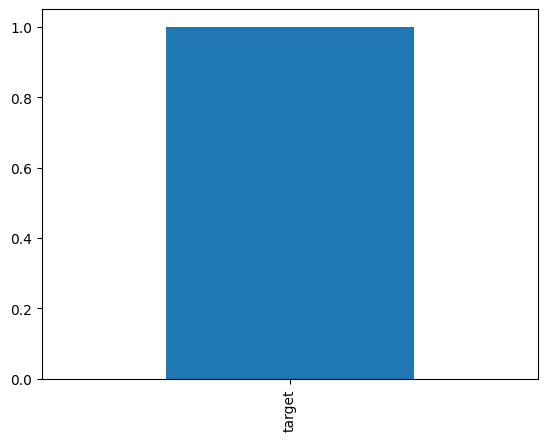

In [ ]:
# смотрим есть ли признаки, которые хорошо коррелируют с таргетом
R[abs(R['target'])>0.5]['target'].plot(kind='bar')

In [ ]:
r = R.abs().unstack().sort_values().reset_index()[::2]
r

level_0  \
0                      Tax Effect Of Unusual Items   
2                                      Diluted EPS   
4                                     Total Assets   
6                               Tax Rate For Calcs   
8                        Change In Working Capital   
...                                            ...   
3016       Total Liabilities Net Minority Interest   
3018                                 Capital Stock   
3020  Gains Losses Not Affecting Retained Earnings   
3022          Total Equity Gross Minority Interest   
3024                                        target   

                                           level_1         0  
0                                    Tax Provision  0.000021  
2                                   Long Term Debt  0.000064  
4                                        Basic EPS  0.000129  
6                                  Changes In Cash  0.000163  
8                               Tax Rate For Calcs  0.000251  
...                                            ...       ...  
3016       Total Liabilities Net Minority Interest  1.000000  
3018                                 Capital Stock  1.000000  
3020  Gains Losses Not Affecting Retained Earnings  1.000000  
3022          Total Equity Gross Minority Interest  1.000000  
3024                                        target  1.000000  

[1513 rows x 3 columns]

In [ ]:
cols_less=list(r[r[0]<0.8]['level_0'].unique())

In [ ]:
df_ready = df_preparation2[['ticker', 'publish_date']+cols_less]

In [ ]:
df_ready

ticker publish_date  Tax Effect Of Unusual Items  Diluted EPS  \
0         A   2022-08-16                 0.000000e+00         1.10   
1         A   2022-11-21                 0.000000e+00         1.23   
2         A   2023-02-28                 0.000000e+00         1.19   
3         A   2023-05-23                 0.000000e+00         1.02   
4         A   2023-08-15                 0.000000e+00         0.38   
...     ...          ...                          ...          ...   
2554    ZTS   2022-08-04                -2.104478e+05         1.12   
2555    ZTS   2022-11-03                -3.744000e+06         1.13   
2556    ZTS   2023-02-14                -4.459459e+05         0.99   
2557    ZTS   2023-05-04                -4.398852e+06         1.19   
2558    ZTS   2023-08-08                -1.853211e+06         1.45   

      Total Assets  Tax Rate For Calcs  Change In Working Capital  \
0      10484000000            0.137600               -125000000.0   
1      10516000000            0.141200                -43000000.0   
2      10919000000            0.137500               -190000000.0   
3      10792000000            0.137500                 -7000000.0   
4      10675000000            0.137500                129000000.0   
...            ...                 ...                        ...   
2554   13770000000            0.210448               -326000000.0   
2555   13674000000            0.208000               -112000000.0   
2556   14925000000            0.222973                124000000.0   
2557   13754000000            0.209469               -155000000.0   
2558   13749000000            0.231651               -511000000.0   

      Capital Stock  Cash Flow From Continuing Investing Activities  \
0         3000000.0                                       -73000000   
1         3000000.0                                      -110000000   
2         3000000.0                                      -104000000   
3         3000000.0                                       -77000000   
4         3000000.0                                       -89000000   
...             ...                                             ...   
2554      5000000.0                                      -203000000   
2555      5000000.0                                      -124000000   
2556      5000000.0                                      -438000000   
2557      5000000.0                                      -216000000   
2558      5000000.0                                       -80000000   

      Long Term Debt  ...  Free Cash Flow  \
0       2.732000e+09  ...       244000000   
1       2.733000e+09  ...       378000000   
2       2.733000e+09  ...       220000000   
3       2.733000e+09  ...       341000000   
4       2.734000e+09  ...       481000000   
...              ...  ...             ...   
2554    5.221000e+09  ...       190000000   
2555    5.210000e+09  ...       372000000   
2556    6.552000e+09  ...       570000000   
2557    6.559000e+09  ...       326000000   
2558    6.555000e+09  ...        17000000   

      Diluted NI Availto Com Stockholders  \
0                               329000000   
1                               368000000   
2                               352000000   
3                               302000000   
4                               111000000   
...                                   ...   
2554                            529000000   
2555                            529000000   
2556                            461000000   
2557                            552000000   
2558                            671000000   

      Net Income From Continuing And Discontinued Operation  \
0                                             329000000       
1                                             368000000       
2                                             352000000       
3                                             302000000       
4                                             111000000       
...                   

In [ ]:
df_ready_1 = df_ready.drop(columns=['publish_date', 'target']).groupby('ticker').pct_change()
df_ready_1

Tax Effect Of Unusual Items  Diluted EPS  Total Assets  \
0                             NaN          NaN           NaN   
1                             NaN     0.118182      0.003052   
2                             NaN    -0.032520      0.038323   
3                             NaN    -0.142857     -0.011631   
4                             NaN    -0.627451     -0.010841   
...                           ...          ...           ...   
2554                          NaN          NaN           NaN   
2555                    16.790638     0.008929     -0.006972   
2556                    -0.880891    -0.123894      0.091487   
2557                     8.864093     0.202020     -0.078459   
2558                    -0.578706     0.218487     -0.000364   

      Tax Rate For Calcs  Change In Working Capital  Capital Stock  \
0                    NaN                        NaN            NaN   
1               0.026163                  -0.656000            0.0   
2              -0.026204                   3.418605            0.0   
3               0.000000                  -0.963158            0.0   
4               0.000000                 -19.428571            0.0   
...                  ...                        ...            ...   
2554                 NaN                        NaN            NaN   
2555           -0.011632                  -0.656442            0.0   
2556            0.071986                  -2.107143            0.0   
2557           -0.060563                  -2.250000            0.0   
2558            0.105896                   2.296774            0.0   

      Cash Flow From Continuing Investing Activities  Long Term Debt  \
0                                                NaN             NaN   
1                                           0.506849        0.000366   
2                                          -0.054545        0.000000   
3                                          -0.259615        0.000000   
4                                           0.155844        0.000366   
...                                              ...             ...   
2554                                             NaN             NaN   
2555                                       -0.389163       -0.002107   
2556                                        2.532258        0.257582   
2557                                       -0.506849        0.001068   
2558                                       -0.629630       -0.000610   

      Common Stock  Cash And Cash Equivalents  ...  Free Cash Flow  \
0              NaN                        NaN  ...             NaN   
1              0.0                  -0.016807  ...        0.549180   
2              0.0                   0.187085  ...       -0.417989   
3              0.0                  -0.060000  ...        0.550000   
4              0.0                   0.131064  ...        0.410557   
...            ...                        ...  ...             ...   
2554           NaN                        NaN  ...             NaN   
2555           0.0                  -0.054758  ...        0.957895   
2556           0.0                   0.429085  ...        0.532258   
2557           0.0                  -0.411518  ...       -0.428070   
2558           0.0                  -0.185748  ...       -0.947853   

      Diluted NI Availto Com Stockholders  \
0                                     NaN   
1                                0.118541   
2                               -0.043478   
3                               -0.142045   
4                               -0.632450   
...                                   ...   
2554                                  NaN   
2555                             0.000000   
2556                            -0.128544   
2557                             0.197397   
2558                             0.215580   

      Net Income From Continuing And Discontinued Operation  \
0                                                   NaN       
1                      

In [ ]:
# Добавляю таргет
df_ready_2 = pd.concat([df_ready_1, df_ready['target']], axis=1)
df_ready_2

Tax Effect Of Unusual Items  Diluted EPS  Total Assets  \
0                             NaN          NaN           NaN   
1                             NaN     0.118182      0.003052   
2                             NaN    -0.032520      0.038323   
3                             NaN    -0.142857     -0.011631   
4                             NaN    -0.627451     -0.010841   
...                           ...          ...           ...   
2554                          NaN          NaN           NaN   
2555                    16.790638     0.008929     -0.006972   
2556                    -0.880891    -0.123894      0.091487   
2557                     8.864093     0.202020     -0.078459   
2558                    -0.578706     0.218487     -0.000364   

      Tax Rate For Calcs  Change In Working Capital  Capital Stock  \
0                    NaN                        NaN            NaN   
1               0.026163                  -0.656000            0.0   
2              -0.026204                   3.418605            0.0   
3               0.000000                  -0.963158            0.0   
4               0.000000                 -19.428571            0.0   
...                  ...                        ...            ...   
2554                 NaN                        NaN            NaN   
2555           -0.011632                  -0.656442            0.0   
2556            0.071986                  -2.107143            0.0   
2557           -0.060563                  -2.250000            0.0   
2558            0.105896                   2.296774            0.0   

      Cash Flow From Continuing Investing Activities  Long Term Debt  \
0                                                NaN             NaN   
1                                           0.506849        0.000366   
2                                          -0.054545        0.000000   
3                                          -0.259615        0.000000   
4                                           0.155844        0.000366   
...                                              ...             ...   
2554                                             NaN             NaN   
2555                                       -0.389163       -0.002107   
2556                                        2.532258        0.257582   
2557                                       -0.506849        0.001068   
2558                                       -0.629630       -0.000610   

      Common Stock  Cash And Cash Equivalents  ...  \
0              NaN                        NaN  ...   
1              0.0                  -0.016807  ...   
2              0.0                   0.187085  ...   
3              0.0                  -0.060000  ...   
4              0.0                   0.131064  ...   
...            ...                        ...  ...   
2554           NaN                        NaN  ...   
2555           0.0                  -0.054758  ...   
2556           0.0                   0.429085  ...   
2557           0.0                  -0.411518  ...   
2558           0.0                  -0.185748  ...   

      Diluted NI Availto Com Stockholders  \
0                                     NaN   
1                                0.118541   
2                               -0.043478   
3                               -0.142045   
4                               -0.632450   
...                                   ...   
2554                                  NaN   
2555                             0.000000   
2556                            -0.128544   
2557                             0.197397   
2558                             0.215580   

      Net Income From Continuing And Discontinued Operation  \
0                                                   NaN       
1                                              0.118541       
2                                             -0.043478       
3                                             -0.142045       
4                         

In [ ]:
# Удаляю строки с пропусками
df_ready_3 = df_ready_2.dropna(thresh=3)
df_ready_3

Tax Effect Of Unusual Items  Diluted EPS  Total Assets  \
1                             NaN     0.118182      0.003052   
2                             NaN    -0.032520      0.038323   
3                             NaN    -0.142857     -0.011631   
4                             NaN    -0.627451     -0.010841   
6                             NaN     0.014706     -0.019290   
...                           ...          ...           ...   
2553                    -1.000000    -0.165414     -0.015163   
2555                    16.790638     0.008929     -0.006972   
2556                    -0.880891    -0.123894      0.091487   
2557                     8.864093     0.202020     -0.078459   
2558                    -0.578706     0.218487     -0.000364   

      Tax Rate For Calcs  Change In Working Capital  Capital Stock  \
1               0.026163                  -0.656000       0.000000   
2              -0.026204                   3.418605       0.000000   
3               0.000000                  -0.963158       0.000000   
4               0.000000                 -19.428571       0.000000   
6               0.262770                        NaN       0.000000   
...                  ...                        ...            ...   
2553           -0.184116                  -4.518072       0.003248   
2555           -0.011632                  -0.656442       0.000000   
2556            0.071986                  -2.107143       0.000000   
2557           -0.060563                  -2.250000       0.000000   
2558            0.105896                   2.296774       0.000000   

      Cash Flow From Continuing Investing Activities  Long Term Debt  \
1                                           0.506849        0.000366   
2                                          -0.054545        0.000000   
3                                          -0.259615        0.000000   
4                                           0.155844        0.000366   
6                                          -1.843918       -0.022252   
...                                              ...             ...   
2553                                        1.011844       -0.188537   
2555                                       -0.389163       -0.002107   
2556                                        2.532258        0.257582   
2557                                       -0.506849        0.001068   
2558                                       -0.629630       -0.000610   

      Common Stock  Cash And Cash Equivalents  ...  \
1         0.000000                  -0.016807  ...   
2         0.000000                   0.187085  ...   
3         0.000000                  -0.060000  ...   
4         0.000000                   0.131064  ...   
6         0.000000                  -0.172070  ...   
...            ...                        ...  ...   
2553      0.004082                  -0.330534  ...   
2555      0.000000                  -0.054758  ...   
2556      0.000000                   0.429085  ...   
2557      0.000000                  -0.411518  ...   
2558      0.000000                  -0.185748  ...   

      Diluted NI Availto Com Stockholders  \
1                                0.118541   
2                               -0.043478   
3                               -0.142045   
4                               -0.632450   
6                                0.014706   
...                                   ...   
2553                            -0.161616   
2555                             0.000000   
2556                            -0.128544   
2557                             0.197397   
2558                             0.215580   

      Net Income From Continuing And Discontinued Operation  \
1                                              0.118541       
2                                             -0.043478       
3                                             -0.142045       
4                                             -0.632450       
6                         

In [ ]:
# Разделим данные на признаки и таргет

X_ready_3 = df_ready_3.drop(columns=['target'])
y_ready_3 = df_ready_3['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Разобьем данные на обучение и тест при помощи функции train_test_split
X_train_ready_3, X_test_ready_3, y_train_ready_3, y_test_ready_3 = train_test_split(X_ready_3, y_ready_3, test_size=0.2, random_state=14)

In [ ]:
# Импортируем LightGBM
import lightgbm as lgb

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Воспользуем функцией RandomizedSearchCV
# В качестве определения "лучшей" модели выберем neg_mean_absolute_error
grid_LGBM_ready_3 = RandomizedSearchCV(
            lgb.LGBMRegressor(verbose=0),          # Алгоритм, в котором будем подбирать параметры
            param_distributions = {                 # Сетка параметров в виде словаря
                'max_depth': range(2, 7),
                'learning_rate': np.linspace(0.001, 0.3, 100),
            },
            scoring = 'neg_mean_absolute_error',
            cv = 3,                                 # CV для кросс-валидации (число или индексы)
            n_jobs = -1,                            # Число используемых ядер для работы
            return_train_score = True,              # Считать ли метрики на обучающей части
            n_iter=10,                              # Число итераций (сколько будем брать случайных наборов)
            verbose = 5,                            # Чем больше, тем алгоритм разговорчивее
        )

# Обучим сетку на обучающем датасете при помощи метода fit
grid_LGBM_ready_3.fit(X_train_ready_3, y_train_ready_3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(verbose=0), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.001     , 0.0040202 , 0.0070404 , 0.01006061, 0.01308081,
       0.01610101, 0.01912121, 0.02214141, 0.02516162, 0.02818182,
       0.03120202, 0.03422222, 0.03724242, 0.04026263, 0.04328283,
       0.04630303, 0.04932323, 0.05234343, 0.05536364, 0.05838384,
       0.06140404, 0.06442424, 0....
       0.22751515, 0.23053535, 0.23355556, 0.23657576, 0.23959596,
       0.24261616, 0.24563636, 0.24865657, 0.25167677, 0.25469697,
       0.25771717, 0.26073737, 0.26375758, 0.26677778, 0.26979798,
       0.27281818, 0.27583838, 0.27885859, 0.28187879, 0.28489899,
       0.28791919, 0.29093939, 0.2939596 , 0.2969798 , 0.3       ]),
                                        'max_depth': range(2, 7)},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=5)

In [ ]:
# Выведем набор лучших параметров (они хранятся в best_params_) и лучшую метрику

print(f"Лучшая метрика:   {grid_LGBM_ready_3.best_score_}")
print(f"Лучшие параметры: {grid_LGBM_ready_3.best_params_}")

Лучшая метрика:   -0.020657450622346918
Лучшие параметры: {'max_depth': 2, 'learning_rate': 0.019121212121212122}


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [ ]:
y_test_ready_3_pred=grid_LGBM_ready_3.best_estimator_.predict(X_test_ready_3)
y_train_ready_3_pred=grid_LGBM_ready_3.best_estimator_.predict(X_train_ready_3)

In [ ]:
print(f'MAE test: {mean_absolute_error(y_test_ready_3, y_test_ready_3_pred)}')
print(f'MAE train: {mean_absolute_error(y_train_ready_3, y_train_ready_3_pred)}')
print(f'R2 test: {r2_score(y_test_ready_3, y_test_ready_3_pred)}')
print(f'R2 train: {r2_score(y_train_ready_3, y_train_ready_3_pred)}')
print(f'MAPE test: {mean_absolute_percentage_error(y_test_ready_3, y_test_ready_3_pred)}')
print(f'MAPE train: {mean_absolute_percentage_error(y_train_ready_3, y_train_ready_3_pred)}')

MAE test: 0.021230213340180257
MAE train: 0.019927266777392087
R2 test: 0.010659167685658444
R2 train: 0.052927077385064636
MAPE test: 1.1749168137441635
MAPE train: 6556826788.548533


In [ ]:
abs(y_ready_3).mean()

0.020604043664805175

## Классификация на основе признаков без большой корреляции

In [ ]:
# Преобразуем таргет так, чтобы он был равен 0, при падении цены, 1 - при росте
df_class = df_ready_3.copy()
df_class['target'] = 1*(df_class['target']>0)
df_class

Tax Effect Of Unusual Items  Diluted EPS  Total Assets  \
1                             NaN     0.118182      0.003052   
2                             NaN    -0.032520      0.038323   
3                             NaN    -0.142857     -0.011631   
4                             NaN    -0.627451     -0.010841   
6                             NaN     0.014706     -0.019290   
...                           ...          ...           ...   
2553                    -1.000000    -0.165414     -0.015163   
2555                    16.790638     0.008929     -0.006972   
2556                    -0.880891    -0.123894      0.091487   
2557                     8.864093     0.202020     -0.078459   
2558                    -0.578706     0.218487     -0.000364   

      Tax Rate For Calcs  Change In Working Capital  Capital Stock  \
1               0.026163                  -0.656000       0.000000   
2              -0.026204                   3.418605       0.000000   
3               0.000000                  -0.963158       0.000000   
4               0.000000                 -19.428571       0.000000   
6               0.262770                        NaN       0.000000   
...                  ...                        ...            ...   
2553           -0.184116                  -4.518072       0.003248   
2555           -0.011632                  -0.656442       0.000000   
2556            0.071986                  -2.107143       0.000000   
2557           -0.060563                  -2.250000       0.000000   
2558            0.105896                   2.296774       0.000000   

      Cash Flow From Continuing Investing Activities  Long Term Debt  \
1                                           0.506849        0.000366   
2                                          -0.054545        0.000000   
3                                          -0.259615        0.000000   
4                                           0.155844        0.000366   
6                                          -1.843918       -0.022252   
...                                              ...             ...   
2553                                        1.011844       -0.188537   
2555                                       -0.389163       -0.002107   
2556                                        2.532258        0.257582   
2557                                       -0.506849        0.001068   
2558                                       -0.629630       -0.000610   

      Common Stock  Cash And Cash Equivalents  ...  \
1         0.000000                  -0.016807  ...   
2         0.000000                   0.187085  ...   
3         0.000000                  -0.060000  ...   
4         0.000000                   0.131064  ...   
6         0.000000                  -0.172070  ...   
...            ...                        ...  ...   
2553      0.004082                  -0.330534  ...   
2555      0.000000                  -0.054758  ...   
2556      0.000000                   0.429085  ...   
2557      0.000000                  -0.411518  ...   
2558      0.000000                  -0.185748  ...   

      Diluted NI Availto Com Stockholders  \
1                                0.118541   
2                               -0.043478   
3                               -0.142045   
4                               -0.632450   
6                                0.014706   
...                                   ...   
2553                            -0.161616   
2555                             0.000000   
2556                            -0.128544   
2557                             0.197397   
2558                             0.215580   

      Net Income From Continuing And Discontinued Operation  \
1                                              0.118541       
2                                             -0.043478       
3                                             -0.142045       
4                                             -0.632450       
6                         

In [ ]:
# Посмотрим на соотношение классов в данных

print(f"В датасете {len(df_class)} объектов")
print(f"В данных {sum(df_class.target == 0)} объектов класса 0")
print(f"В данных {sum(df_class.target == 1)} объектов класса 1")

В датасете 2053 объектов
В данных 982 объектов класса 0
В данных 1071 объектов класса 1


In [ ]:
# Разделим данные на признаки и таргет

X_class = df_class.drop(columns=['target'])
y_class = df_class['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Разобьем данные на обучение и тест при помощи функции train_test_split

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=14)

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [ ]:
# Воспользуем функцией RandomizedSearchCV
# В качестве определения "лучшей" модели выберем f1_score

grid_LGBM_class = RandomizedSearchCV(
            lgb.LGBMClassifier(verbose=0),          # Алгоритм, в котором будем подбирать параметры
            param_distributions = {                 # Сетка параметров в виде словаря
                'max_depth': range(2, 7),
                'learning_rate': np.linspace(0.001, 0.3, 100),
            },
            scoring = 'f1',
            cv = 3,                                 # CV для кросс-валидации (число или индексы)
            n_jobs = -1,                            # Число используемых ядер для работы
            return_train_score = True,              # Считать ли метрики на обучающей части
            n_iter=10,                              # Число итераций (сколько будем брать случайных наборов)
            verbose = 5,                            # Чем больше, тем алгоритм разговорчивее
        )

# Обучим сетку на обучающем датасете при помощи метода fit
grid_LGBM_class.fit(X_train_class, y_train_class)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000763 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(verbose=0), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.001     , 0.0040202 , 0.0070404 , 0.01006061, 0.01308081,
       0.01610101, 0.01912121, 0.02214141, 0.02516162, 0.02818182,
       0.03120202, 0.03422222, 0.03724242, 0.04026263, 0.04328283,
       0.04630303, 0.04932323, 0.05234343, 0.05536364, 0.05838384,
       0.06140404, 0.06442424, 0...
       0.21241414, 0.21543434, 0.21845455, 0.22147475, 0.22449495,
       0.22751515, 0.23053535, 0.23355556, 0.23657576, 0.23959596,
       0.24261616, 0.24563636, 0.24865657, 0.25167677, 0.25469697,
       0.25771717, 0.26073737, 0.26375758, 0.26677778, 0.26979798,
       0.27281818, 0.27583838, 0.27885859, 0.28187879, 0.28489899,
       0.28791919, 0.29093939, 0.2939596 , 0.2969798 , 0.3       ]),
                                        'max_depth': range(2, 7)},
                   return_train_score=True, scoring='f1', verbose=5)

In [ ]:
# Выведем набор лучших параметров и лучшую метрику

print(f"Лучшая метрика:   {grid_LGBM_class.best_score_}")
print(f"Лучшие параметры: {grid_LGBM_class.best_params_}")

Лучшая метрика:   0.566850667392463
Лучшие параметры: {'max_depth': 3, 'learning_rate': 0.019121212121212122}


TEST
              precision    recall  f1-score   support

           0       0.46      0.35      0.40       186
           1       0.55      0.66      0.60       225

    accuracy                           0.52       411
   macro avg       0.51      0.51      0.50       411
weighted avg       0.51      0.52      0.51       411

TRAIN
              precision    recall  f1-score   support

           0       0.79      0.59      0.67       796
           1       0.69      0.85      0.76       846

    accuracy                           0.72      1642
   macro avg       0.74      0.72      0.71      1642
weighted avg       0.73      0.72      0.72      1642



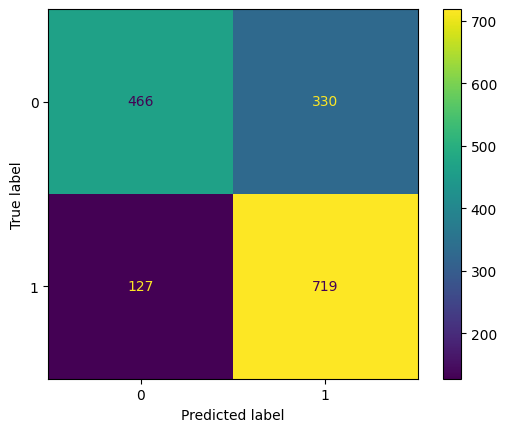

In [ ]:
# Посмотрим как с работой теперь справиться LGBM

# Получить отчет классификации передав в classification_report реальные метки и предсказанные
print("TEST")
print(classification_report(y_test_class, grid_LGBM_class.best_estimator_.predict(X_test_class)))
print("TRAIN")
print(classification_report(y_train_class, grid_LGBM_class.best_estimator_.predict(X_train_class)))

# Посмотреть на матрицу ошибок, передав в plot_confusion_matrix модель, тестовые данные и тестовые метки
confusion_matrix_class = confusion_matrix(y_train_class, grid_LGBM_class.best_estimator_.predict(X_train_class))
ConfusionMatrixDisplay(confusion_matrix_class, display_labels=[0, 1]).plot()

plt.show()

# Классификация на основе всех признаков

In [ ]:
df_ready_all = df_preparation.copy()
df_ready_all['target'] = 1*(df_ready_all['target']>0)
df_ready_all

ticker publish_date  Tax Effect Of Unusual Items  Tax Rate For Calcs  \
0         A   2022-08-16                 0.000000e+00            0.137600   
1         A   2022-11-21                 0.000000e+00            0.141200   
2         A   2023-02-28                 0.000000e+00            0.137500   
3         A   2023-05-23                 0.000000e+00            0.137500   
4         A   2023-08-15                 0.000000e+00            0.137500   
...     ...          ...                          ...                 ...   
2554    ZTS   2022-08-04                -2.104478e+05            0.210448   
2555    ZTS   2022-11-03                -3.744000e+06            0.208000   
2556    ZTS   2023-02-14                -4.459459e+05            0.222973   
2557    ZTS   2023-05-04                -4.398852e+06            0.209469   
2558    ZTS   2023-08-08                -1.853211e+06            0.231651   

      Normalized EBITDA  Total Unusual Items  \
0           496000000.0                  NaN   
1           551000000.0                  NaN   
2           502000000.0                  NaN   
3           472000000.0                  NaN   
4           227000000.0                  NaN   
...                 ...                  ...   
2554        761000000.0           -1000000.0   
2555        853000000.0          -18000000.0   
2556        691000000.0           -2000000.0   
2557        818000000.0          -21000000.0   
2558        975000000.0           -8000000.0   

      Total Unusual Items Excluding Goodwill  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
...                                      ...   
2554                              -1000000.0   
2555                             -18000000.0   
2556                              -2000000.0   
2557                             -21000000.0   
2558                              -8000000.0   

      Net Income From Continuing Operation Net Minority Interest  \
0                                             329000000            
1                                             368000000            
2                                             352000000            
3                                             302000000            
4                                             111000000            
...                                                 ...            
2554                                          529000000            
2555                                          529000000            
2556                                          461000000            
2557                                          552000000            
2558                                          671000000            

      Reconciled Depreciation  Reconciled Cost Of Revenue  ...  \
0                  80000000.0                7.790000e+08  ...   
1                  73000000.0                8.370000e+08  ...   
2                  67000000.0                7.880000e+08  ...   
3                  71000000.0                7.930000e+08  ...   
4                  71000000.0                1.014000e+09  ...   
...                       ...                         ...  ...   
2554               37000000.0                6.250000e+08  ...   
2555              115000000.0                5.290000e+08  ...   
2556               35000000.0                6.530000e+08  ...   
2557               37000000.0                5.880000e+08  ...   
2558               37000000.0                6.070000e+08  ...   

      Net Income Extraordinary  EBITDA  Net Income From Tax Loss Carryforward  \
0                          NaN     NaN                                    NaN   
1                          NaN     NaN                                    NaN   
2                          NaN     NaN                                   

In [ ]:
df_ready_all_1 = df_ready_all.drop(columns=['publish_date', 'target']).groupby('ticker').pct_change()
df_ready_all_1

Tax Effect Of Unusual Items  Tax Rate For Calcs  Normalized EBITDA  \
0                             NaN                 NaN                NaN   
1                             NaN            0.026163           0.110887   
2                             NaN           -0.026204          -0.088929   
3                             NaN            0.000000          -0.059761   
4                             NaN            0.000000          -0.519068   
...                           ...                 ...                ...   
2554                          NaN                 NaN                NaN   
2555                    16.790638           -0.011632           0.120894   
2556                    -0.880891            0.071986          -0.189918   
2557                     8.864093           -0.060563           0.183792   
2558                    -0.578706            0.105896           0.191932   

      Total Unusual Items  Total Unusual Items Excluding Goodwill  \
0                     NaN                                     NaN   
1                     NaN                                     NaN   
2                     NaN                                     NaN   
3                     NaN                                     NaN   
4                     NaN                                     NaN   
...                   ...                                     ...   
2554                  NaN                                     NaN   
2555            17.000000                               17.000000   
2556            -0.888889                               -0.888889   
2557             9.500000                                9.500000   
2558            -0.619048                               -0.619048   

      Net Income From Continuing Operation Net Minority Interest  \
0                                                   NaN            
1                                              0.118541            
2                                             -0.043478            
3                                             -0.142045            
4                                             -0.632450            
...                                                 ...            
2554                                                NaN            
2555                                           0.000000            
2556                                          -0.128544            
2557                                           0.197397            
2558                                           0.215580            

      Reconciled Depreciation  Reconciled Cost Of Revenue      EBIT  \
0                         NaN                         NaN       NaN   
1                   -0.087500                    0.074454  0.149038   
2                   -0.082192                   -0.058542 -0.089958   
3                    0.059701                    0.006345 -0.078161   
4                    0.000000                    0.278689 -0.610973   
...                       ...                         ...       ...   
2554                      NaN                         NaN       NaN   
2555                 2.108108                   -0.153600 -0.004149   
2556                -0.695652                    0.234405 -0.091667   
2557                 0.057143                   -0.099541  0.162080   
2558                 0.000000                    0.032313  0.223684   

      Net Interest Income  ...  Cash Flow From Discontinued Operation  \
0                     NaN  ...                                    NaN   
1                0.058824  ...                                    NaN   
2               -0.111111  ...                                    NaN   
3               -0.250000  ...                                    NaN   
4               -0.083333  ...                                    NaN   
...                   ...  ...                                    ...   
2554                  NaN  ...                                    NaN   
2555      

In [ ]:
# Добавляю таргет
df_ready_all_2 = pd.concat([df_ready_all_1, df_ready_all['target']], axis=1)
df_ready_all_2

Tax Effect Of Unusual Items  Tax Rate For Calcs  Normalized EBITDA  \
0                             NaN                 NaN                NaN   
1                             NaN            0.026163           0.110887   
2                             NaN           -0.026204          -0.088929   
3                             NaN            0.000000          -0.059761   
4                             NaN            0.000000          -0.519068   
...                           ...                 ...                ...   
2554                          NaN                 NaN                NaN   
2555                    16.790638           -0.011632           0.120894   
2556                    -0.880891            0.071986          -0.189918   
2557                     8.864093           -0.060563           0.183792   
2558                    -0.578706            0.105896           0.191932   

      Total Unusual Items  Total Unusual Items Excluding Goodwill  \
0                     NaN                                     NaN   
1                     NaN                                     NaN   
2                     NaN                                     NaN   
3                     NaN                                     NaN   
4                     NaN                                     NaN   
...                   ...                                     ...   
2554                  NaN                                     NaN   
2555            17.000000                               17.000000   
2556            -0.888889                               -0.888889   
2557             9.500000                                9.500000   
2558            -0.619048                               -0.619048   

      Net Income From Continuing Operation Net Minority Interest  \
0                                                   NaN            
1                                              0.118541            
2                                             -0.043478            
3                                             -0.142045            
4                                             -0.632450            
...                                                 ...            
2554                                                NaN            
2555                                           0.000000            
2556                                          -0.128544            
2557                                           0.197397            
2558                                           0.215580            

      Reconciled Depreciation  Reconciled Cost Of Revenue      EBIT  \
0                         NaN                         NaN       NaN   
1                   -0.087500                    0.074454  0.149038   
2                   -0.082192                   -0.058542 -0.089958   
3                    0.059701                    0.006345 -0.078161   
4                    0.000000                    0.278689 -0.610973   
...                       ...                         ...       ...   
2554                      NaN                         NaN       NaN   
2555                 2.108108                   -0.153600 -0.004149   
2556                -0.695652                    0.234405 -0.091667   
2557                 0.057143                   -0.099541  0.162080   
2558                 0.000000                    0.032313  0.223684   

      Net Interest Income  ...  Net Income Extraordinary  EBITDA  \
0                     NaN  ...                       NaN     NaN   
1                0.058824  ...                       NaN     NaN   
2               -0.111111  ...                       NaN     NaN   
3               -0.250000  ...                       NaN     NaN   
4               -0.083333  ...                       NaN     NaN   
...                   ...  ...                       ...     ...   
2554                  NaN  ...                       NaN     NaN   
2555            -0.245283  ...                    

In [ ]:
# Удаляю строки с пропусками
df_ready_all_3 = df_ready_all_2.dropna(thresh=3)
df_ready_all_3

Tax Effect Of Unusual Items  Tax Rate For Calcs  Normalized EBITDA  \
1                             NaN            0.026163           0.110887   
2                             NaN           -0.026204          -0.088929   
3                             NaN            0.000000          -0.059761   
4                             NaN            0.000000          -0.519068   
6                             NaN            0.262770           0.080299   
...                           ...                 ...                ...   
2553                    -1.000000           -0.184116                NaN   
2555                    16.790638           -0.011632           0.120894   
2556                    -0.880891            0.071986          -0.189918   
2557                     8.864093           -0.060563           0.183792   
2558                    -0.578706            0.105896           0.191932   

      Total Unusual Items  Total Unusual Items Excluding Goodwill  \
1                     NaN                                     NaN   
2                     NaN                                     NaN   
3                     NaN                                     NaN   
4                     NaN                                     NaN   
6                     NaN                                     NaN   
...                   ...                                     ...   
2553            -1.000000                               -1.000000   
2555            17.000000                               17.000000   
2556            -0.888889                               -0.888889   
2557             9.500000                                9.500000   
2558            -0.619048                               -0.619048   

      Net Income From Continuing Operation Net Minority Interest  \
1                                              0.118541            
2                                             -0.043478            
3                                             -0.142045            
4                                             -0.632450            
6                                              0.014706            
...                                                 ...            
2553                                          -0.142157            
2555                                           0.000000            
2556                                          -0.128544            
2557                                           0.197397            
2558                                           0.215580            

      Reconciled Depreciation  Reconciled Cost Of Revenue      EBIT  \
1                   -0.087500                    0.074454  0.149038   
2                   -0.082192                   -0.058542 -0.089958   
3                    0.059701                    0.006345 -0.078161   
4                    0.000000                    0.278689 -0.610973   
6                         NaN                    0.011505  0.080299   
...                       ...                         ...       ...   
2553                 0.000000                         NaN       NaN   
2555                 2.108108                   -0.153600 -0.004149   
2556                -0.695652                    0.234405 -0.091667   
2557                 0.057143                   -0.099541  0.162080   
2558                 0.000000                    0.032313  0.223684   

      Net Interest Income  ...  Net Income Extraordinary  EBITDA  \
1                0.058824  ...                       NaN     NaN   
2               -0.111111  ...                       NaN     NaN   
3               -0.250000  ...                       NaN     NaN   
4               -0.083333  ...                       NaN     NaN   
6               -0.022779  ...                       NaN     NaN   
...                   ...  ...                       ...     ...   
2553            -0.129602  ...                       NaN     NaN   
2555            -0.245283  ...                    

In [ ]:
# Разделим данные на признаки и таргет

X_class_all = df_ready_all_3.drop(columns=['target'])
y_class_all = df_ready_all_3['target']

In [ ]:
# Разобьем данные на обучение и тест при помощи функции train_test_split

X_train_class_all, X_test_class_all, y_train_class_all, y_test_class_all = train_test_split(X_class_all, y_class_all, test_size=0.2, random_state=14)

## CatBoost

In [ ]:
!pip install catboost

In [ ]:
import catboost as cb

In [ ]:
# Воспользуем функцией RandomizedSearchCV
# В качестве определения "лучшей" модели выберем f1_score

grid_CB_class_all = RandomizedSearchCV(
            cb.CatBoostClassifier(verbose=0),          # Алгоритм, в котором будем подбирать параметры
            param_distributions = {                 # Сетка параметров в виде словаря
                'max_depth': range(2, 7),
                'learning_rate': np.linspace(0.001, 0.3, 100),
            },
            scoring = 'f1',
            cv = 3,                                 # CV для кросс-валидации (число или индексы)
            n_jobs = -1,                            # Число используемых ядер для работы
            return_train_score = True,              # Считать ли метрики на обучающей части
            n_iter=10,                              # Число итераций (сколько будем брать случайных наборов)
            verbose = 5,                            # Чем больше, тем алгоритм разговорчивее
        )

# Обучим сетку на обучающем датасете при помощи метода fit
grid_CB_class_all.fit(X_train_class_all, y_train_class_all)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7e8044741fc0>,
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.001     , 0.0040202 , 0.0070404 , 0.01006061, 0.01308081,
       0.01610101, 0.01912121, 0.02214141, 0.02516162, 0.02818182,
       0.03120202, 0.03422222, 0.03724242, 0.04026263, 0.04328283,
       0.04630303, 0.04932323, 0.05234343, 0.05536364, 0.0...
       0.21241414, 0.21543434, 0.21845455, 0.22147475, 0.22449495,
       0.22751515, 0.23053535, 0.23355556, 0.23657576, 0.23959596,
       0.24261616, 0.24563636, 0.24865657, 0.25167677, 0.25469697,
       0.25771717, 0.26073737, 0.26375758, 0.26677778, 0.26979798,
       0.27281818, 0.27583838, 0.27885859, 0.28187879, 0.28489899,
       0.28791919, 0.29093939, 0.2939596 , 0.2969798 , 0.3       ]),
                                        'max_depth': range(2, 7)},
                   return_train_score=True, scoring='f1', verbose=5)

In [ ]:
# Выведем набор лучших параметров и лучшую метрику

print(f"Лучшая метрика:   {grid_CB_class_all.best_score_}")
print(f"Лучшие параметры: {grid_CB_class_all.best_params_}")

Лучшая метрика:   0.6122241563730675
Лучшие параметры: {'max_depth': 5, 'learning_rate': 0.001}


TEST
              precision    recall  f1-score   support

           0       0.46      0.22      0.30       186
           1       0.55      0.78      0.64       225

    accuracy                           0.53       411
   macro avg       0.50      0.50      0.47       411
weighted avg       0.51      0.53      0.49       411

TRAIN
              precision    recall  f1-score   support

           0       0.95      0.61      0.75       796
           1       0.73      0.97      0.83       846

    accuracy                           0.80      1642
   macro avg       0.84      0.79      0.79      1642
weighted avg       0.84      0.80      0.79      1642



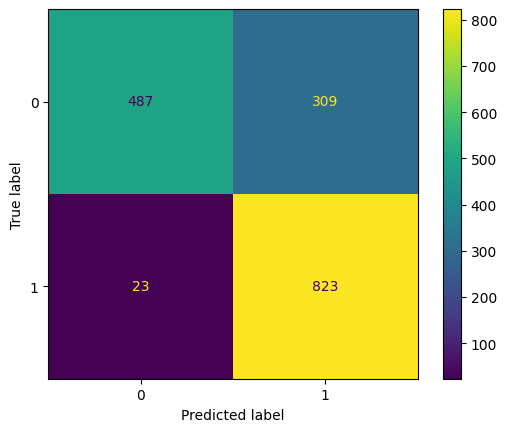

In [ ]:
# Посмотрим как с работой теперь справиться CB

# Получить отчет классификации передав в classification_report реальные метки и предсказанные
print("TEST")
print(classification_report(y_test_class_all, grid_CB_class_all.best_estimator_.predict(X_test_class_all)))
print("TRAIN")
print(classification_report(y_train_class_all, grid_CB_class_all.best_estimator_.predict(X_train_class_all)))

# Посмотреть на матрицу ошибок, передав в plot_confusion_matrix модель, тестовые данные и тестовые метки
confusion_matrix_class_all = confusion_matrix(y_train_class_all, grid_CB_class_all.best_estimator_.predict(X_train_class_all))
ConfusionMatrixDisplay(confusion_matrix_class_all, display_labels=[0, 1]).plot()

plt.show()

## LGBM

In [ ]:
# Воспользуем функцией RandomizedSearchCV
# В качестве определения "лучшей" модели выберем f1_score

grid_LGBM_class_all = RandomizedSearchCV(
            lgb.LGBMClassifier(verbose=0),          # Алгоритм, в котором будем подбирать параметры
            param_distributions = {                 # Сетка параметров в виде словаря
                'max_depth': range(2, 15),
                'learning_rate': np.linspace(0.001, 0.3, 100),
            },
            scoring = 'f1',
            cv = 3,                                 # CV для кросс-валидации (число или индексы)
            n_jobs = -1,                            # Число используемых ядер для работы
            return_train_score = True,              # Считать ли метрики на обучающей части
            n_iter=10,                              # Число итераций (сколько будем брать случайных наборов)
            verbose = 5,                            # Чем больше, тем алгоритм разговорчивее
        )

# Обучим сетку на обучающем датасете при помощи метода fit
grid_LGBM_class_all.fit(X_train_class_all, y_train_class_all)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(verbose=0), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.001     , 0.0040202 , 0.0070404 , 0.01006061, 0.01308081,
       0.01610101, 0.01912121, 0.02214141, 0.02516162, 0.02818182,
       0.03120202, 0.03422222, 0.03724242, 0.04026263, 0.04328283,
       0.04630303, 0.04932323, 0.05234343, 0.05536364, 0.05838384,
       0.06140404, 0.06442424, 0...
       0.21241414, 0.21543434, 0.21845455, 0.22147475, 0.22449495,
       0.22751515, 0.23053535, 0.23355556, 0.23657576, 0.23959596,
       0.24261616, 0.24563636, 0.24865657, 0.25167677, 0.25469697,
       0.25771717, 0.26073737, 0.26375758, 0.26677778, 0.26979798,
       0.27281818, 0.27583838, 0.27885859, 0.28187879, 0.28489899,
       0.28791919, 0.29093939, 0.2939596 , 0.2969798 , 0.3       ]),
                                        'max_depth': range(2, 15)},
                   return_train_score=True, scoring='f1', verbose=5)

In [ ]:
# Выведем набор лучших параметров и лучшую метрику

print(f"Лучшая метрика:   {grid_LGBM_class_all.best_score_}")
print(f"Лучшие параметры: {grid_LGBM_class_all.best_params_}")

Лучшая метрика:   0.5688522338945271
Лучшие параметры: {'max_depth': 4, 'learning_rate': 0.031202020202020203}


TEST
              precision    recall  f1-score   support

           0       0.41      0.37      0.39       186
           1       0.52      0.57      0.55       225

    accuracy                           0.48       411
   macro avg       0.47      0.47      0.47       411
weighted avg       0.47      0.48      0.48       411

TRAIN
              precision    recall  f1-score   support

           0       0.91      0.82      0.87       796
           1       0.85      0.93      0.89       846

    accuracy                           0.88      1642
   macro avg       0.88      0.88      0.88      1642
weighted avg       0.88      0.88      0.88      1642



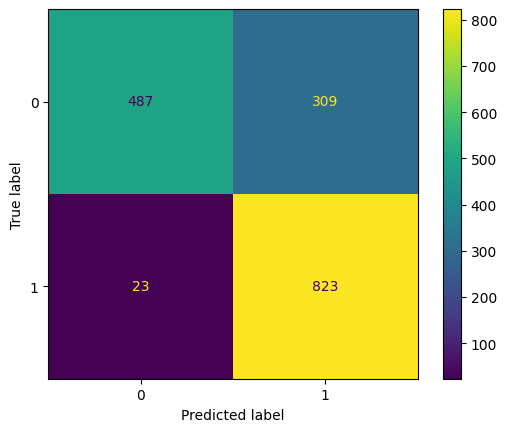

In [ ]:
# Посмотрим как с работой теперь справиться LGBM

# Получить отчет классификации передав в classification_report реальные метки и предсказанные
print("TEST")
print(classification_report(y_test_class_all, grid_LGBM_class_all.best_estimator_.predict(X_test_class_all)))
print("TRAIN")
print(classification_report(y_train_class_all, grid_LGBM_class_all.best_estimator_.predict(X_train_class_all)))

# Посмотреть на матрицу ошибок, передав в plot_confusion_matrix модель, тестовые данные и тестовые метки
confusion_matrix_LGBM_class_all = confusion_matrix(y_train_class_all, grid_LGBM_class_all.best_estimator_.predict(X_train_class_all))
ConfusionMatrixDisplay(confusion_matrix_class_all, display_labels=[0, 1]).plot()

plt.show()

Модель LGBM сильно переобучилась

## Важность признаков

### Поиском важности перемешиванием

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
# Воспользуемся поиском важности перемешиванием, для лучшей модели CatBoost

result_CB = permutation_importance(grid_CB_class_all.best_estimator_, X_test_class_all, y_test_class_all,
                                     n_repeats=30,
                                     random_state=0)

In [ ]:
X_test_class_all.columns[(result_CB['importances_mean'] > 0)]

Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA', 'Total Unusual Items',
       'Total Unusual Items Excluding Goodwill',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Cost Of Revenue', 'EBIT', 'Net Interest Income',
       'Normalized Income',
       ...
       'Receivables Adjustments Allowances', 'Dividend Received Cfo',
       'Purchase Of Investment Properties', 'Preferred Stock Dividends',
       'Preferred Shares Number', 'Preferred Stock Dividend Paid',
       'Current Notes Payable', 'Trading Securities',
       'Change In Interest Payable', 'EBITDA'],
      dtype='object', length=210)

### Отчет о работе модели (при помощи SHAP)

In [ ]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.0 MB/s eta 0:00:00


In [ ]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
explainer = shap.TreeExplainer(grid_CB_class_all.best_estimator_)

In [ ]:
shap_values = explainer.shap_values(X_train_class_all)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


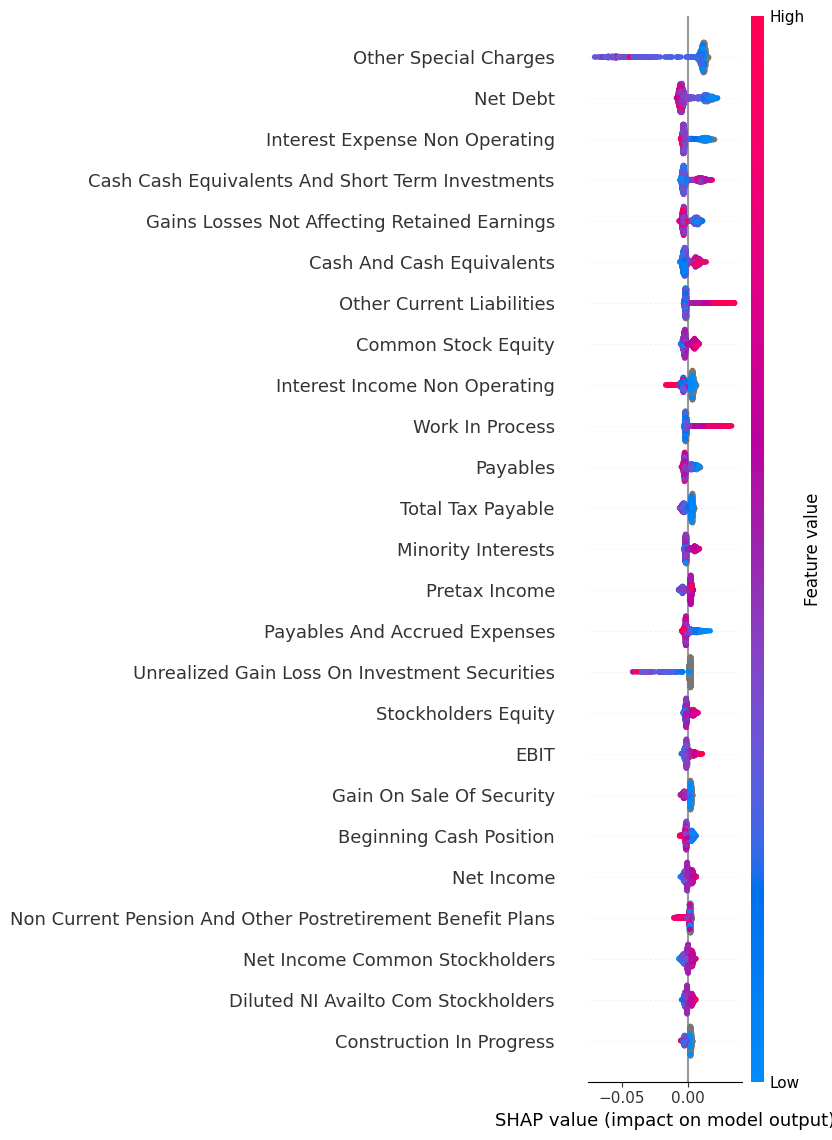

In [ ]:
shap.summary_plot(shap_values, X_train_class_all, max_display=25)

# Изменение подхода к таргету
исходя из графика изменения цены по некоторым акциям видно, что в день отчетности они открываются гэпом вниз или вверх, поэтому целевая метрика может быть лучше выражена, если использовать изменение цены закрытий отчетных дней между каждым кварталом

In [ ]:
# выбираем признаки
cols = ['ticker', 'publish_date', 'Total Revenue', 'Pretax Income', 'Net Income', 'Diluted EPS', 'Cost Of Revenue', 'Total Expenses', 'Tax Provision', 'Total Assets', 'Net Tangible Assets', 'Cash And Cash Equivalents', 'Total Debt', 'Goodwill And Other Intangible Assets', 'open', 'close']

In [ ]:
# создаем таргет
df_change = df[cols].sort_values(['ticker', 'publish_date']).drop_duplicates()
df_change

ticker publish_date  Total Revenue  Pretax Income  Net Income  \
0         A   2022-08-16     1718000000      397000000   329000000   
1         A   2022-11-21     1849000000      455000000   368000000   
2         A   2023-02-28     1756000000      410000000   352000000   
3         A   2023-05-23     1717000000      377000000   302000000   
4         A   2023-08-15     1672000000      132000000   111000000   
...     ...          ...            ...            ...         ...   
2554    ZTS   2022-08-04     2052000000      670000000   529000000   
2555    ZTS   2022-11-03     2002000000      667000000   529000000   
2556    ZTS   2023-02-14     2040000000      592000000   461000000   
2557    ZTS   2023-05-04     2000000000      697000000   552000000   
2558    ZTS   2023-08-08     2180000000      872000000   671000000   

      Diluted EPS  Cost Of Revenue  Total Expenses  Tax Provision  \
0            1.10     7.790000e+08    1.307000e+09     68000000.0   
1            1.23     8.370000e+08    1.378000e+09     87000000.0   
2            1.19     7.880000e+08    1.330000e+09     58000000.0   
3            1.02     7.930000e+08    1.334000e+09     75000000.0   
4            0.38     1.014000e+09    1.539000e+09     21000000.0   
...           ...              ...             ...            ...   
2554         1.12     6.250000e+08    1.326000e+09    141000000.0   
2555         1.13     6.070000e+08    1.279000e+09    139000000.0   
2556         0.99     6.530000e+08    1.350000e+09    132000000.0   
2557         1.19     5.880000e+08    1.272000e+09    146000000.0   
2558         1.45     6.070000e+08    1.346000e+09    202000000.0   

      Total Assets  Net Tangible Assets  Cash And Cash Equivalents  \
0      10484000000            294000000               1.071000e+09   
1      10516000000            516000000               1.053000e+09   
2      10919000000            816000000               1.250000e+09   
3      10792000000           1003000000               1.175000e+09   
4      10675000000           1072000000               1.329000e+09   
...            ...                  ...                        ...   
2554   13770000000            470000000               2.648000e+09   
2555   13674000000            652000000               2.503000e+09   
2556   14925000000            279000000               3.577000e+09   
2557   13754000000            442000000               2.105000e+09   
2558   13749000000            659000000               1.714000e+09   

        Total Debt  Goodwill And Other Intangible Assets        open  \
0     2.912000e+09                          4.797000e+09  132.889999   
1     2.769000e+09                          4.773000e+09  145.619995   
2     2.971000e+09                          4.793000e+09  141.750000   
3     2.733000e+09                          4.778000e+09  129.029999   
4     2.789000e+09                          4.486000e+09  126.309998   
...            ...                                   ...         ...   
2554  6.734000e+09                          4.110000e+09  181.220001   
2555  6.749000e+09                          4.011000e+09  134.149994   
2556  8.090000e+09                          4.126000e+09  173.440002   
2557  6.742000e+09                          4.052000e+09  168.000000   
2558  6.745000e+09                          3.966000e+09  182.149994   

           close  
0     132.770004  
1     145.139999  
2     141.970001  
3     128.639999  
4     125.650002  
...          ...  
2554  174.309998  
2555  131.139999  
2556  171.899994  
2557  178.470001  
2558  189.300003  

[2468 rows x 16 columns]

In [ ]:
# Удаляю дату публикации отчетности и таргет (относительное изменение цены между закрытием и открытием торгов)
# Для остальных признаков считаю их относительное изменение
df_change_1 = df_change.drop(columns=['publish_date']).groupby('ticker').pct_change()

# при подсчете относительного изменения могло произойти деление на ноль, поэтому меняем inf на Nan
df_change_1.replace([np.inf, -np.inf], np.nan, inplace=True)
df_change_1

Total Revenue  Pretax Income  Net Income  Diluted EPS  Cost Of Revenue  \
0               NaN            NaN         NaN          NaN              NaN   
1          0.076251       0.146096    0.118541     0.118182         0.074454   
2         -0.050297      -0.098901   -0.043478    -0.032520        -0.058542   
3         -0.022210      -0.080488   -0.142045    -0.142857         0.006345   
4         -0.026209      -0.649867   -0.632450    -0.627451         0.278689   
...             ...            ...         ...          ...              ...   
2554            NaN            NaN         NaN          NaN              NaN   
2555      -0.024366      -0.004478    0.000000     0.008929        -0.028800   
2556       0.018981      -0.112444   -0.128544    -0.123894         0.075783   
2557      -0.019608       0.177365    0.197397     0.202020        -0.099541   
2558       0.090000       0.251076    0.215580     0.218487         0.032313   

      Total Expenses  Tax Provision  Total Assets  Net Tangible Assets  \
0                NaN            NaN           NaN                  NaN   
1           0.054323       0.279412      0.003052             0.755102   
2          -0.034833      -0.333333      0.038323             0.581395   
3           0.003008       0.293103     -0.011631             0.229167   
4           0.153673      -0.720000     -0.010841             0.068794   
...              ...            ...           ...                  ...   
2554             NaN            NaN           NaN                  NaN   
2555       -0.035445      -0.014184     -0.006972             0.387234   
2556        0.055512      -0.050360      0.091487            -0.572086   
2557       -0.057778       0.106061     -0.078459             0.584229   
2558        0.058176       0.383562     -0.000364             0.490950   

      Cash And Cash Equivalents  Total Debt  \
0                           NaN         NaN   
1                     -0.016807   -0.049107   
2                      0.187085    0.072951   
3                     -0.060000   -0.080108   
4                      0.131064    0.020490   
...                         ...         ...   
2554                        NaN         NaN   
2555                  -0.054758    0.002228   
2556                   0.429085    0.198696   
2557                  -0.411518   -0.166625   
2558                  -0.185748    0.000445   

      Goodwill And Other Intangible Assets      open     close  
0                                      NaN       NaN       NaN  
1                                -0.005003  0.095793  0.093169  
2                                 0.004190 -0.026576 -0.021841  
3                                -0.003130 -0.089735 -0.093893  
4                                -0.061113 -0.021080 -0.023243  
...                                    ...       ...       ...  
2554                                   NaN       NaN       NaN  
2555                             -0.024088 -0.259740 -0.247662  
2556                              0.028671  0.292881  0.310813  
2557                             -0.017935 -0.031365  0.038220  
2558                             -0.021224  0.084226  0.060682  

[2468 rows x 14 columns]

In [ ]:
# Удаляю строки с пропусками (первый квартал для каждой компании)
df_change_2 = df_change_1.dropna(thresh=2)
df_change_2

Total Revenue  Pretax Income  Net Income  Diluted EPS  Cost Of Revenue  \
1          0.076251       0.146096    0.118541     0.118182         0.074454   
2         -0.050297      -0.098901   -0.043478    -0.032520        -0.058542   
3         -0.022210      -0.080488   -0.142045    -0.142857         0.006345   
4         -0.026209      -0.649867   -0.632450    -0.627451         0.278689   
6          0.002980       0.091211    0.014706     0.014706         0.011505   
...             ...            ...         ...          ...              ...   
2553      -0.070322      -0.198582   -0.142157    -0.165414              NaN   
2555      -0.024366      -0.004478    0.000000     0.008929        -0.028800   
2556       0.018981      -0.112444   -0.128544    -0.123894         0.075783   
2557      -0.019608       0.177365    0.197397     0.202020        -0.099541   
2558       0.090000       0.251076    0.215580     0.218487         0.032313   

      Total Expenses  Tax Provision  Total Assets  Net Tangible Assets  \
1           0.054323       0.279412      0.003052             0.755102   
2          -0.034833      -0.333333      0.038323             0.581395   
3           0.003008       0.293103     -0.011631             0.229167   
4           0.153673      -0.720000     -0.010841             0.068794   
6           0.010238       0.377953     -0.019290            -0.036938   
...              ...            ...           ...                  ...   
2553             NaN      -0.346154     -0.015163             0.024266   
2555       -0.035445      -0.014184     -0.006972             0.387234   
2556        0.055512      -0.050360      0.091487            -0.572086   
2557       -0.057778       0.106061     -0.078459             0.584229   
2558        0.058176       0.383562     -0.000364             0.490950   

      Cash And Cash Equivalents  Total Debt  \
1                     -0.016807   -0.049107   
2                      0.187085    0.072951   
3                     -0.060000   -0.080108   
4                      0.131064    0.020490   
6                     -0.172070   -0.004079   
...                         ...         ...   
2553                  -0.330534   -0.188537   
2555                  -0.054758    0.002228   
2556                   0.429085    0.198696   
2557                  -0.411518   -0.166625   
2558                  -0.185748    0.000445   

      Goodwill And Other Intangible Assets      open     close  
1                                -0.005003  0.095793  0.093169  
2                                 0.004190 -0.026576 -0.021841  
3                                -0.003130 -0.089735 -0.093893  
4                                -0.061113 -0.021080 -0.023243  
6                                -0.001621 -0.049080 -0.044034  
...                                    ...       ...       ...  
2553                             -0.000941  0.057042  0.053178  
2555                             -0.024088 -0.259740 -0.247662  
2556                              0.028671  0.292881  0.310813  
2557                             -0.017935 -0.031365  0.038220  
2558                             -0.021224  0.084226  0.060682  

[1969 rows x 14 columns]

## Задача классификации

In [ ]:
df_change_class=df_change_2.copy()
df_change_class['target'] = 1*(df_change_2['close']>0)
df_change_class = df_change_class.drop(columns=['close', 'open'])
df_change_class

Total Revenue  Pretax Income  Net Income  Diluted EPS  Cost Of Revenue  \
1          0.076251       0.146096    0.118541     0.118182         0.074454   
2         -0.050297      -0.098901   -0.043478    -0.032520        -0.058542   
3         -0.022210      -0.080488   -0.142045    -0.142857         0.006345   
4         -0.026209      -0.649867   -0.632450    -0.627451         0.278689   
6          0.002980       0.091211    0.014706     0.014706         0.011505   
...             ...            ...         ...          ...              ...   
2553      -0.070322      -0.198582   -0.142157    -0.165414              NaN   
2555      -0.024366      -0.004478    0.000000     0.008929        -0.028800   
2556       0.018981      -0.112444   -0.128544    -0.123894         0.075783   
2557      -0.019608       0.177365    0.197397     0.202020        -0.099541   
2558       0.090000       0.251076    0.215580     0.218487         0.032313   

      Total Expenses  Tax Provision  Total Assets  Net Tangible Assets  \
1           0.054323       0.279412      0.003052             0.755102   
2          -0.034833      -0.333333      0.038323             0.581395   
3           0.003008       0.293103     -0.011631             0.229167   
4           0.153673      -0.720000     -0.010841             0.068794   
6           0.010238       0.377953     -0.019290            -0.036938   
...              ...            ...           ...                  ...   
2553             NaN      -0.346154     -0.015163             0.024266   
2555       -0.035445      -0.014184     -0.006972             0.387234   
2556        0.055512      -0.050360      0.091487            -0.572086   
2557       -0.057778       0.106061     -0.078459             0.584229   
2558        0.058176       0.383562     -0.000364             0.490950   

      Cash And Cash Equivalents  Total Debt  \
1                     -0.016807   -0.049107   
2                      0.187085    0.072951   
3                     -0.060000   -0.080108   
4                      0.131064    0.020490   
6                     -0.172070   -0.004079   
...                         ...         ...   
2553                  -0.330534   -0.188537   
2555                  -0.054758    0.002228   
2556                   0.429085    0.198696   
2557                  -0.411518   -0.166625   
2558                  -0.185748    0.000445   

      Goodwill And Other Intangible Assets  target  
1                                -0.005003       1  
2                                 0.004190       0  
3                                -0.003130       0  
4                                -0.061113       0  
6                                -0.001621       0  
...                                    ...     ...  
2553                             -0.000941       1  
2555                             -0.024088       0  
2556                              0.028671       1  
2557                             -0.017935       1  
2558                             -0.021224       1  

[1969 rows x 13 columns]

### Распределение признаков с учетом класса

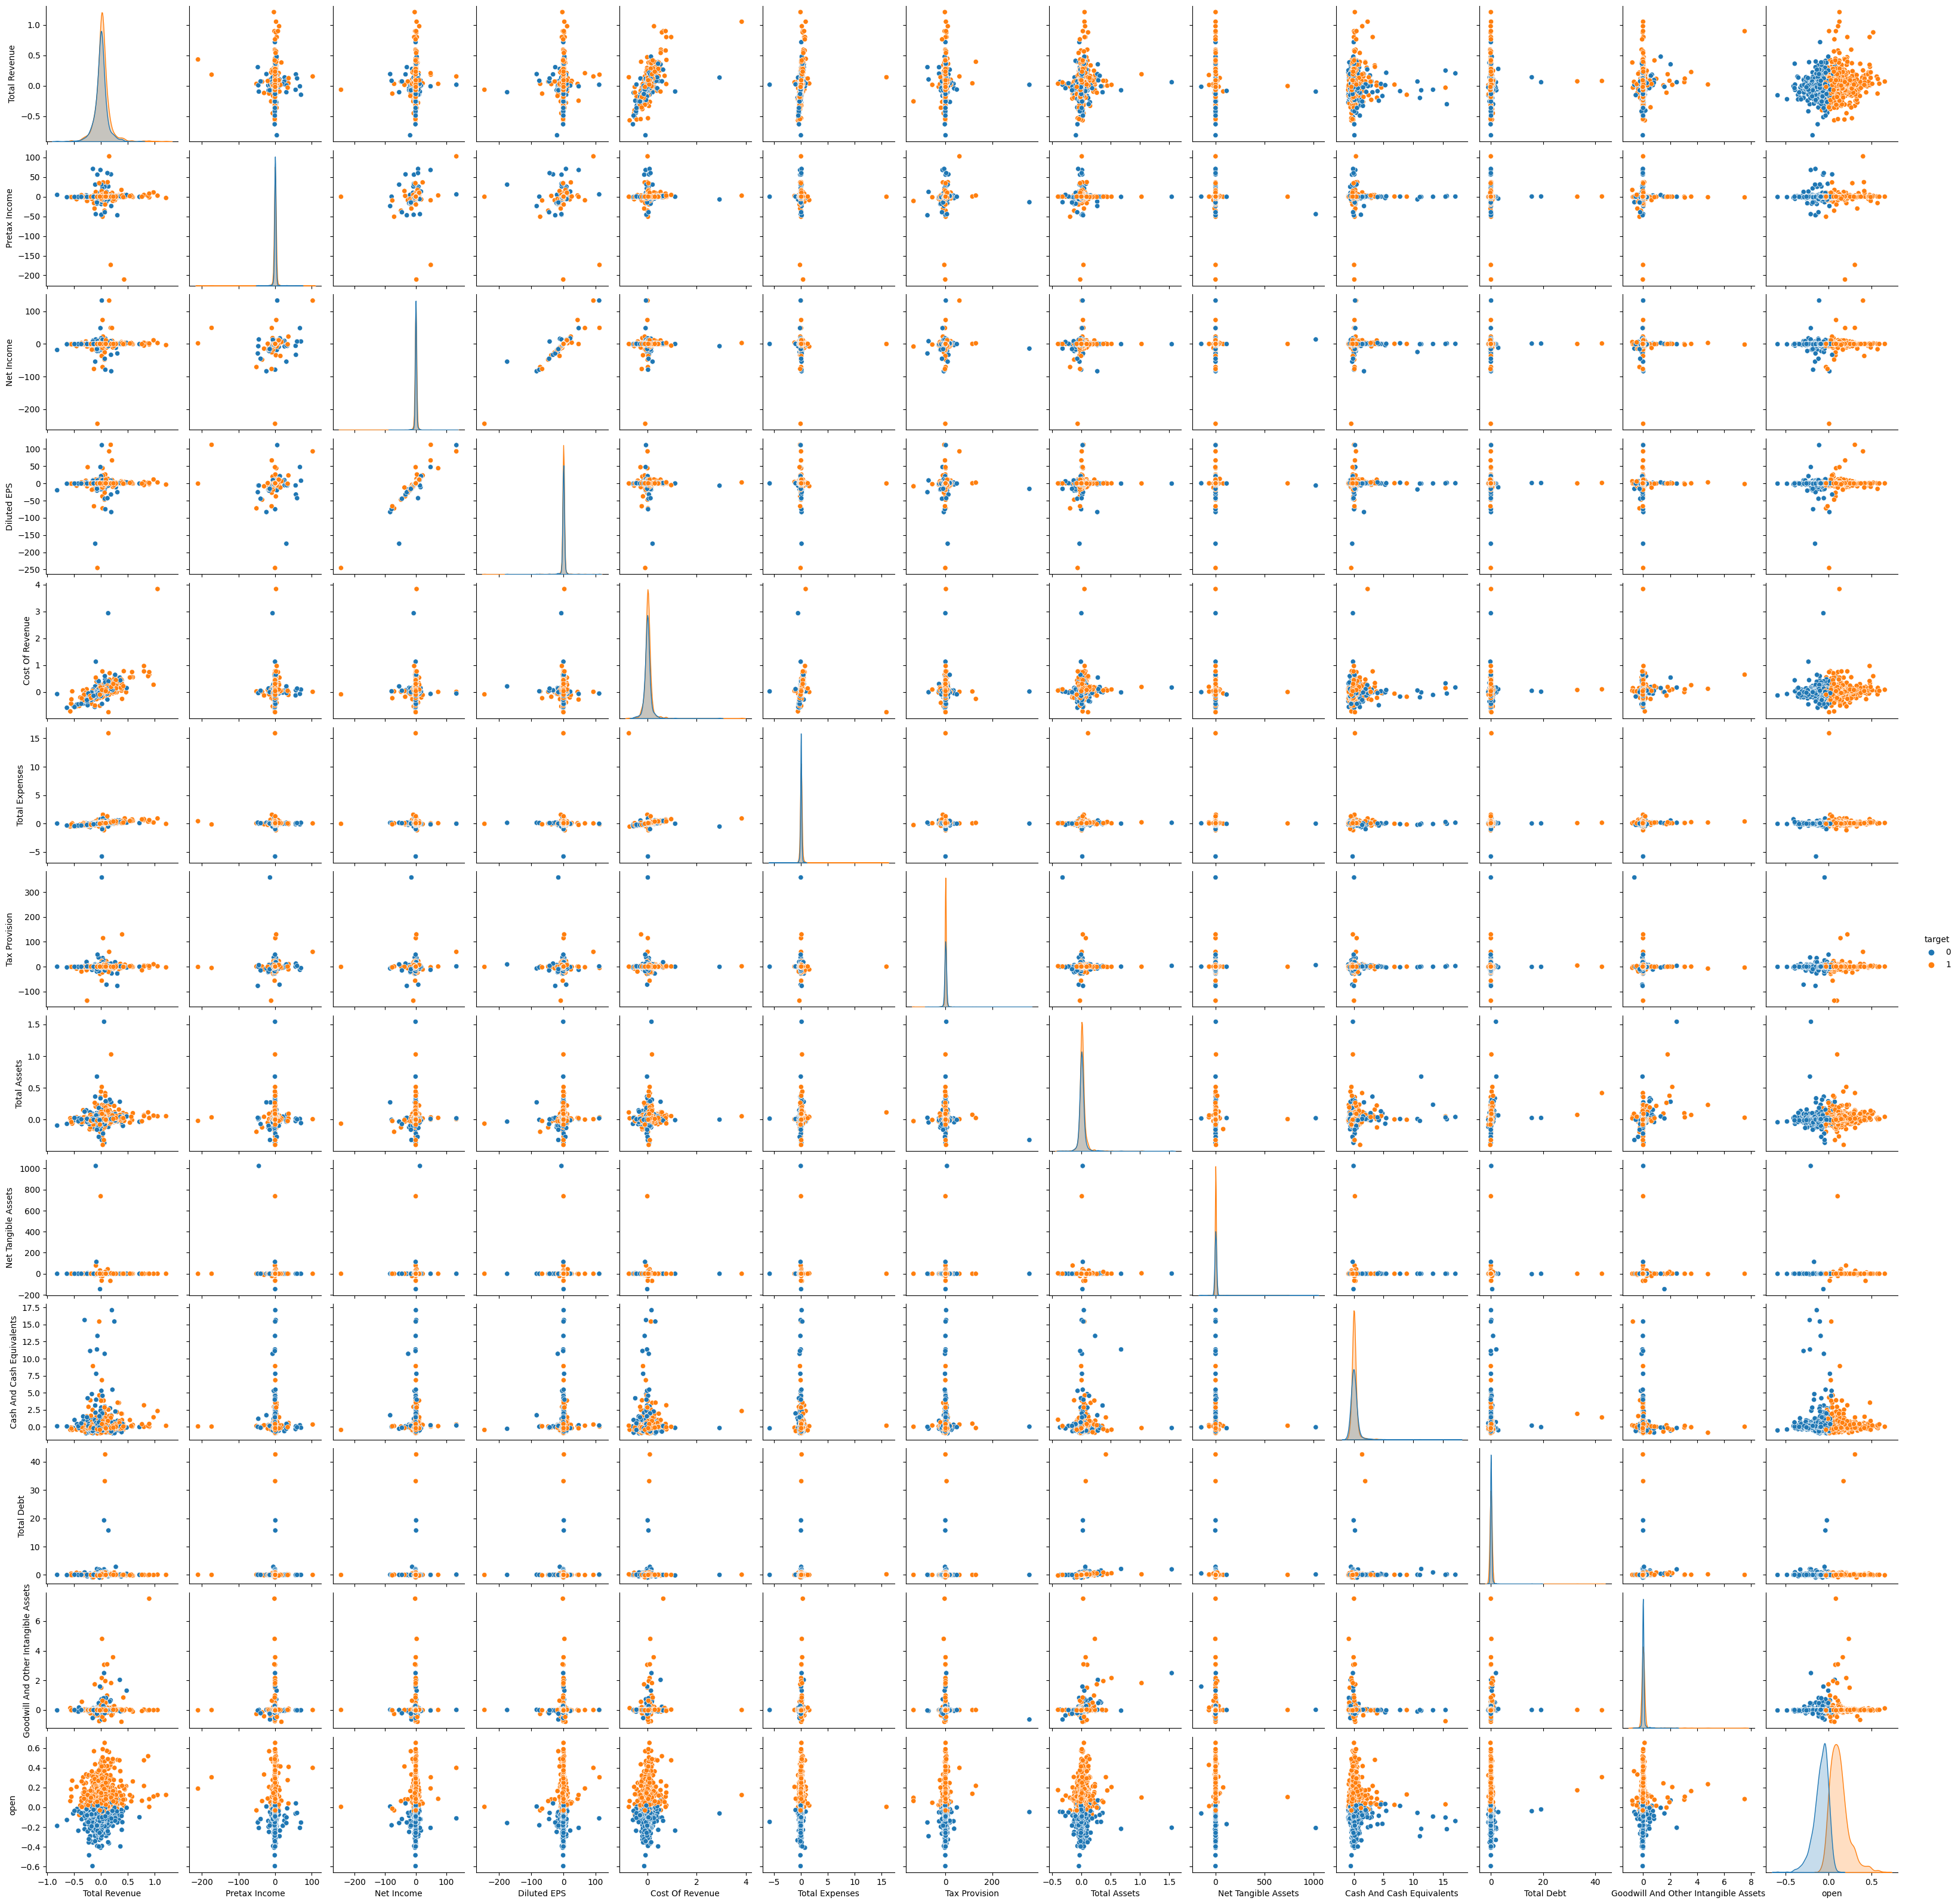

In [ ]:
sns.pairplot(df_change_class, hue='target')

### Подготовка и обучение

In [ ]:
# Разделим данные на признаки и таргет

X_change_class = df_change_class.drop(columns=['target'])
y_change_class = df_change_class['target']

# Разобьем данные на обучение и тест при помощи функции train_test_split
from sklearn.model_selection import train_test_split
X_train_change_class, X_test_change_class, y_train_change_class, y_test_change_class = train_test_split(X_change_class, y_change_class, test_size=0.2, stratify=y_change_class, random_state=14)

In [ ]:
# Импортируем LightGBM
import lightgbm as lgb

# Воспользуем функцией RandomizedSearchCV
# В качестве определения "лучшей" модели выберем f1_score

from sklearn.model_selection import RandomizedSearchCV
grid_LGBM_change_class = RandomizedSearchCV(
            lgb.LGBMClassifier(verbose=0),          # Алгоритм, в котором будем подбирать параметры
            param_distributions = {                 # Сетка параметров в виде словаря
                'max_depth': range(2, 7),
                'learning_rate': np.linspace(0.001, 0.3, 100),
            },
            scoring = 'f1',
            cv = 3,                                 # CV для кросс-валидации (число или индексы)
            n_jobs = -1,                            # Число используемых ядер для работы
            return_train_score = True,              # Считать ли метрики на обучающей части
            n_iter=10,                              # Число итераций (сколько будем брать случайных наборов)
            verbose = 0,                            # Чем больше, тем алгоритм разговорчивее
        )

# Обучим сетку на обучающем датасете при помощи метода fit
grid_LGBM_change_class.fit(X_train_change_class, y_train_change_class)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(verbose=0), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.001     , 0.0040202 , 0.0070404 , 0.01006061, 0.01308081,
       0.01610101, 0.01912121, 0.02214141, 0.02516162, 0.02818182,
       0.03120202, 0.03422222, 0.03724242, 0.04026263, 0.04328283,
       0.04630303, 0.04932323, 0.05234343, 0.05536364, 0.05838384,
       0.06140404, 0.06442424, 0...
       0.21241414, 0.21543434, 0.21845455, 0.22147475, 0.22449495,
       0.22751515, 0.23053535, 0.23355556, 0.23657576, 0.23959596,
       0.24261616, 0.24563636, 0.24865657, 0.25167677, 0.25469697,
       0.25771717, 0.26073737, 0.26375758, 0.26677778, 0.26979798,
       0.27281818, 0.27583838, 0.27885859, 0.28187879, 0.28489899,
       0.28791919, 0.29093939, 0.2939596 , 0.2969798 , 0.3       ]),
                                        'max_depth': range(2, 7)},
                   return_train_score=True, scoring='f1')

### Результаты

In [ ]:
# Выведем набор лучших параметров и лучшую метрику

print(f"Лучшая метрика:   {grid_LGBM_change_class.best_score_}")
print(f"Лучшие параметры: {grid_LGBM_change_class.best_params_}")

Лучшая метрика:   0.6929426870233025
Лучшие параметры: {'max_depth': 2, 'learning_rate': 0.019121212121212122}


TEST
              precision    recall  f1-score   support

           0       0.60      0.29      0.39       175
           1       0.60      0.84      0.70       219

    accuracy                           0.60       394
   macro avg       0.60      0.57      0.55       394
weighted avg       0.60      0.60      0.56       394

TRAIN
              precision    recall  f1-score   support

           0       0.70      0.34      0.46       699
           1       0.63      0.88      0.73       876

    accuracy                           0.64      1575
   macro avg       0.66      0.61      0.59      1575
weighted avg       0.66      0.64      0.61      1575



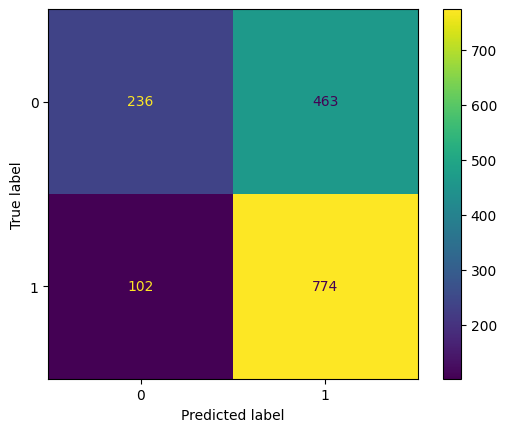

In [ ]:
y_test_change_class_pred=grid_LGBM_change_class.best_estimator_.predict(X_test_change_class)
y_train_change_class_pred=grid_LGBM_change_class.best_estimator_.predict(X_train_change_class)

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
# Получить отчет классификации передав в classification_report реальные метки и предсказанные
print("TEST")
print(classification_report(y_test_change_class, y_test_change_class_pred))
print("TRAIN")
print(classification_report(y_train_change_class, y_train_change_class_pred))

# Посмотреть на матрицу ошибок, передав в plot_confusion_matrix модель, тестовые данные и тестовые метки
confusion_matrix_LGBM_change_class = confusion_matrix(y_train_change_class, y_train_change_class_pred)
ConfusionMatrixDisplay(confusion_matrix_LGBM_change_class, display_labels=[0, 1]).plot()

plt.show()

Результат неплохо улучшился, такой подход к таргету дает свои результаты И его следует далее улучшать

In [ ]:
from sklearn.inspection import permutation_importance
# Воспользуемся поиском важности перемешиванием, для лучшей модели CatBoost

result_LGBM_change_class = permutation_importance(grid_LGBM_change_class.best_estimator_, X_test_change_class, y_test_change_class,
                                     n_repeats=30,
                                     random_state=0)
X_test_change_class.columns[(result_LGBM_change_class['importances_mean'] > 0)]

Index(['Total Revenue', 'Pretax Income', 'Total Expenses', 'Total Assets',
       'Cash And Cash Equivalents', 'Total Debt',
       'Goodwill And Other Intangible Assets'],
      dtype='object')

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


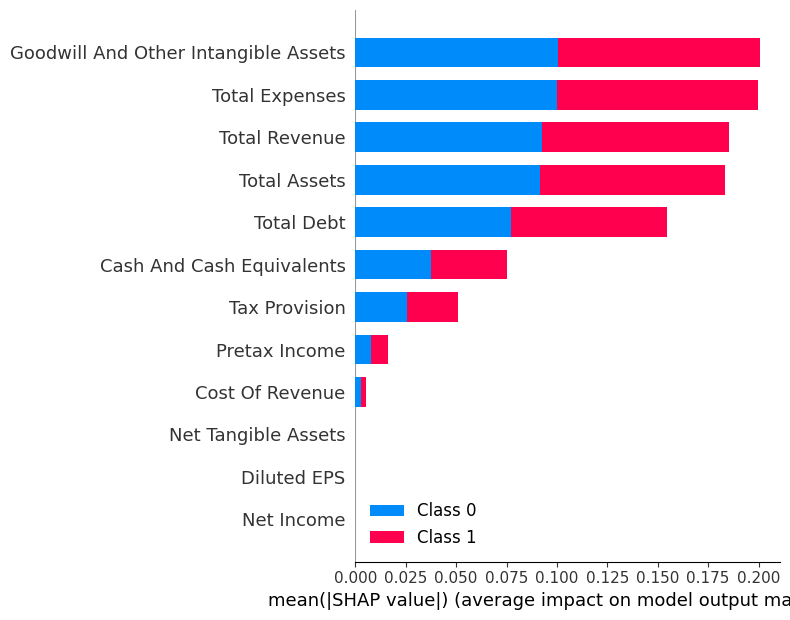

In [ ]:
explainer = shap.TreeExplainer(grid_LGBM_change_class.best_estimator_)
shap_values = explainer.shap_values(X_test_change_class)
shap.summary_plot(shap_values, X_test_change_class, max_display=25)

# Дальшейшее развитие

Другие изменения таргета:
*   Цена закрытия за день до отчетности
*   Цена закрытия за неделю до отчетности

Обогатить данными за предыдущие периоды

Добавить макроэкономическими данными:
*   ставку ФРС
*   Инфляция и т.п.

